## Project: Campus Recruitment Dataset
* Hello, My name is GUDLA RAGUWING, persuing Data Science course at Innomatics Research Labs. The project is all about performing Exploratory data analysis, Building a machine learning best fit model that performs well on train as well as test data and also building an ANN - Artificial neural network model and Plotting the best decision surface.
* The theme of the project is to pic a binary classification data set from kaggle and perform the above activities.

## About the DataSet
* The data set consists of Placement data of students in a certain(XYZ) campus. It contains the input features as secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students
* THe target variable/feature is status of the students who attended the interview - whether they got placed or not.

## Problem Statement:
* Given a query point containing the placement data of a student like secondary and higher secondary school percentage and degree specialization, work exp etc,,. predict whether will he be placed or not placed

## Import Required Libraries

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [5]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout

## Load the Data and Perform EDA

In [6]:
df = pd.read_csv(r"C:\Users\GUDLA RAGUWING\OneDrive\Desktop\Data\Placement_Data_Full_Class.csv")

In [7]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [8]:
df.drop('sl_no', axis = 1, inplace = True)

In [9]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [10]:
df.duplicated().value_counts() # No duplicates

False    215
dtype: int64

In [11]:
df.describe(include = 'all')

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215,215.000000,215,215.000000,215,215,215.000000,215,215,215.000000,215,215.000000,215,148.000000
unique,2,NaN,2,NaN,2,3,NaN,3,2,NaN,2,NaN,2,NaN
top,M,NaN,Central,NaN,Others,Commerce,NaN,Comm&Mgmt,No,NaN,Mkt&Fin,NaN,Placed,NaN
freq,139,NaN,116,NaN,131,113,NaN,145,141,NaN,120,NaN,148,NaN
mean,NaN,67.303395,NaN,66.333163,NaN,NaN,66.370186,NaN,NaN,72.100558,NaN,62.278186,NaN,288655.405405
std,NaN,10.827205,NaN,10.897509,NaN,NaN,7.358743,NaN,NaN,13.275956,NaN,5.833385,NaN,93457.452420
min,NaN,40.890000,NaN,37.000000,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,51.210000,NaN,200000.000000
25%,NaN,60.600000,NaN,60.900000,NaN,NaN,61.000000,NaN,NaN,60.000000,NaN,57.945000,NaN,240000.000000
50%,NaN,67.000000,NaN,65.000000,NaN,NaN,66.000000,NaN,NaN,71.000000,NaN,62.000000,NaN,265000.000000
75%,NaN,75.700000,NaN,73.000000,NaN,NaN,72.000000,NaN,NaN,83.500000,NaN,66.255000,NaN,300000.000000


## Univariate Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


## check for missing values

In [13]:
#pip install missingno

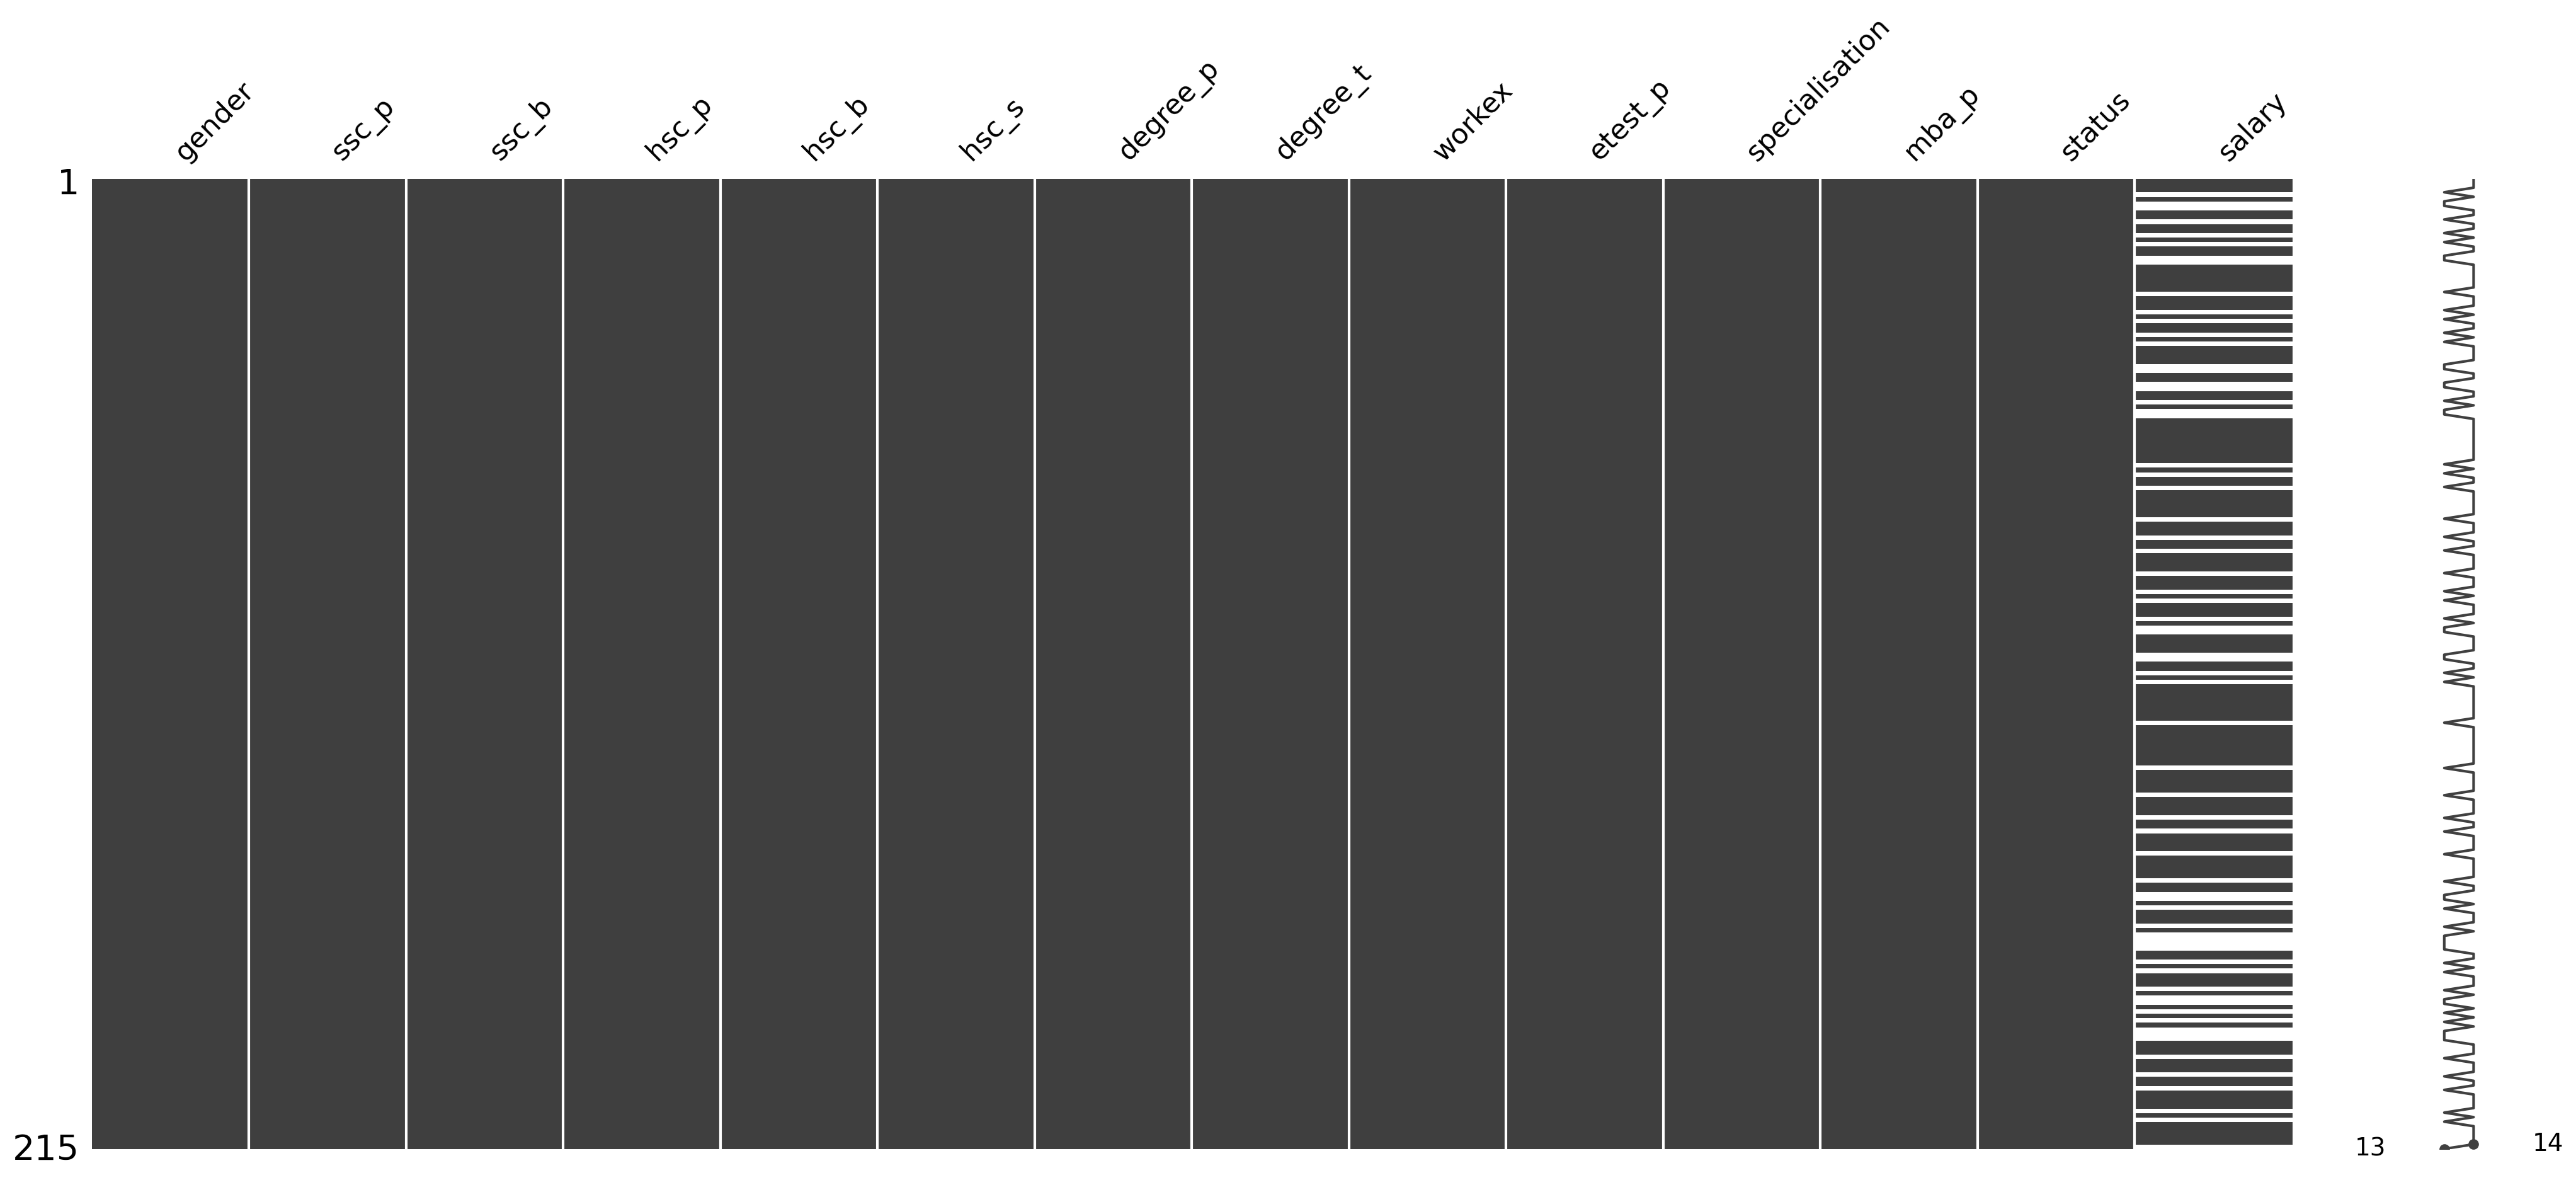

In [14]:
## Using missingno module
'''missingno is a library in python which is having a functionality of viewing 
    the missing values in pandas DataFrame through visualiation.
    This can be in the form of either a barplot, matrix plot, heatmap, or a dendrogram'''
import missingno as msno 
msno.matrix(df);

### Intution:
* As we can observe in feature `salary` there are some empty white lines/straps which indicate the presence of missing values

In [15]:
df.salary.isna().sum()

67

### Intution:
* There are 67 null values in our salary feature , All of them are not placed candidates so the pay will be zero for them.
* Hence we cannot fill them with mean or medain , the best possible way to fill is with `0` ( no pay).

In [16]:
df.salary.fillna(value = 0, inplace = True)

In [17]:
df.salary.isna().sum()

0

In [18]:
df.salary

0      270000.0
1      200000.0
2      250000.0
3           0.0
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         0.0
Name: salary, Length: 215, dtype: float64

## Normality Test 
* Tests whether the numerical features are following the normal istribution or not.

In [19]:
from scipy import stats

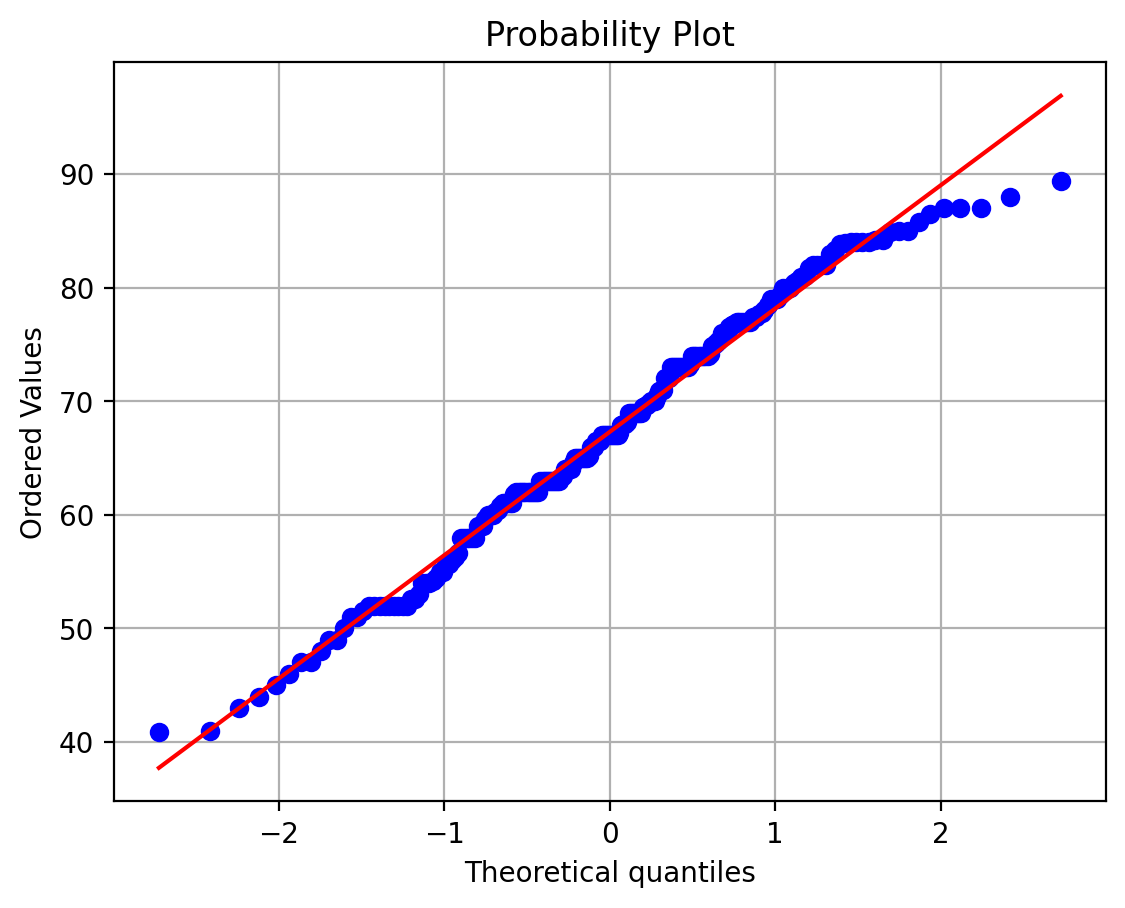

In [20]:
# QQ plot
stats.probplot(df['ssc_p'], dist='norm', plot = plt)
plt.grid();

### Intution:
* The feature `ssc_p` is following normal distibution since the data points are falling on the 45 degree line of QQ plot.

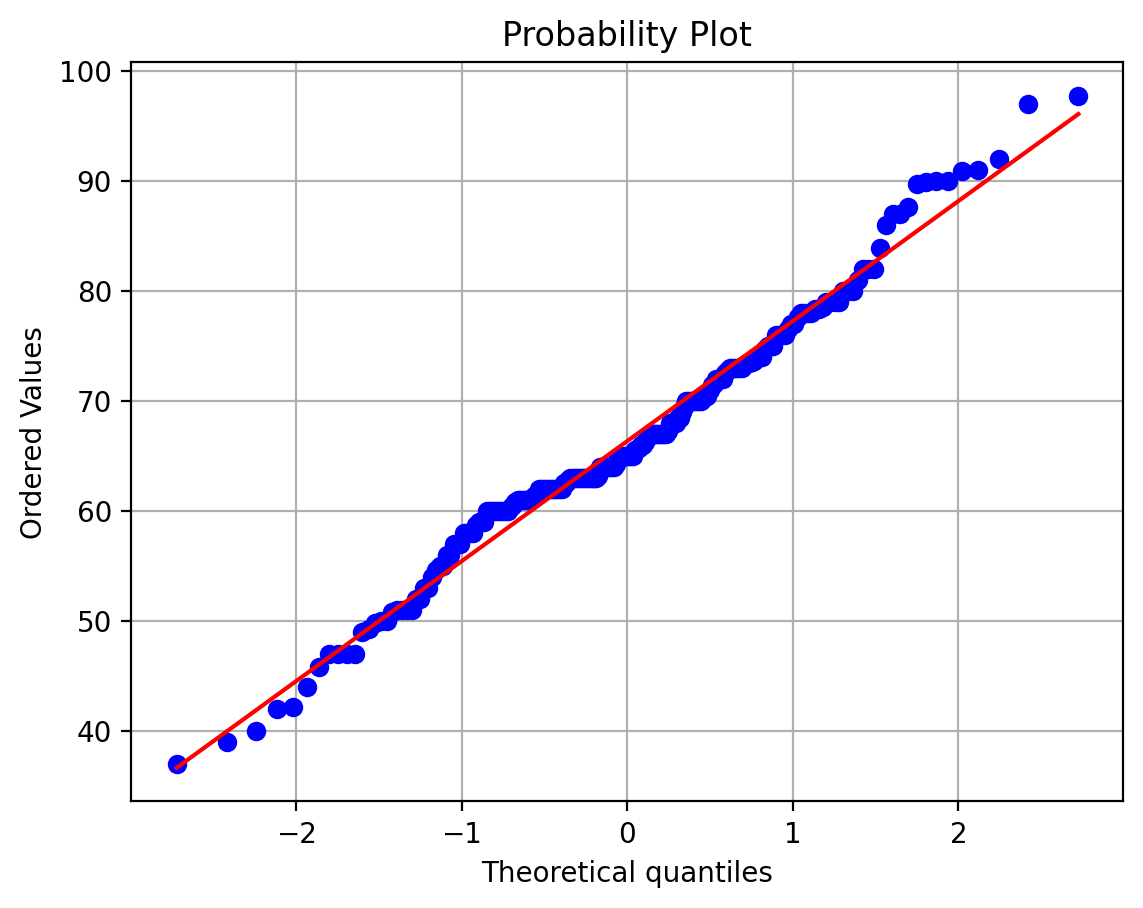

In [21]:
# QQ plot
stats.probplot(df['hsc_p'], dist='norm', plot = plt)
plt.grid();

### Intution:
* The feature `ssc_p` is following normal distibution (some of the points are little far fom the line) yet we can say that majority data points are falling on the 45 degree line of QQ plot.

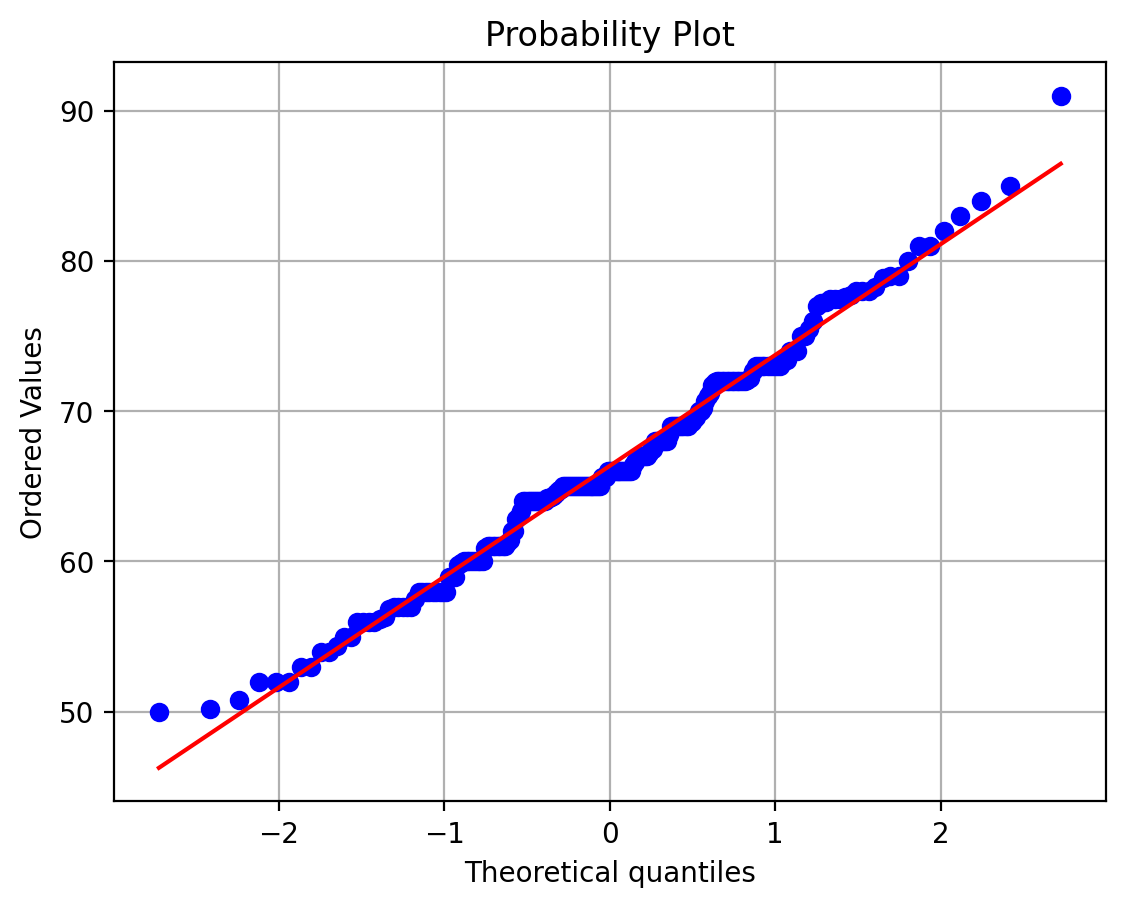

In [22]:
# QQ plot
stats.probplot(df['degree_p'], dist='norm', plot = plt)
plt.grid();

### Intution:
* The feature `degree_p` is following normal distibution since the data points are falling on the 45 degree line of QQ plot.

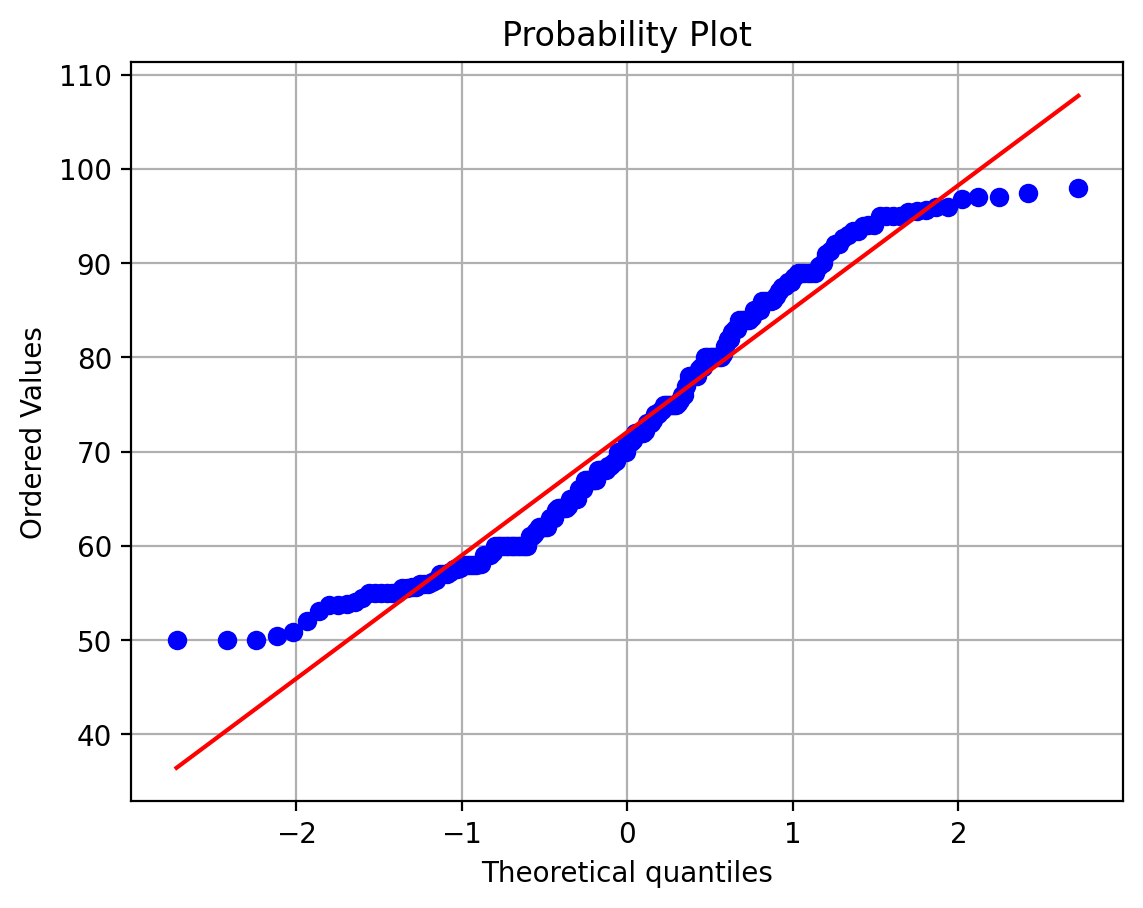

In [23]:
# QQ plot
stats.probplot(df['etest_p'], dist='norm', plot = plt)
plt.grid();

### Intution:
* The feature `etest_p` is not following normal distibution since majority of the data points are not falling on the 45 degree line of QQ plot.

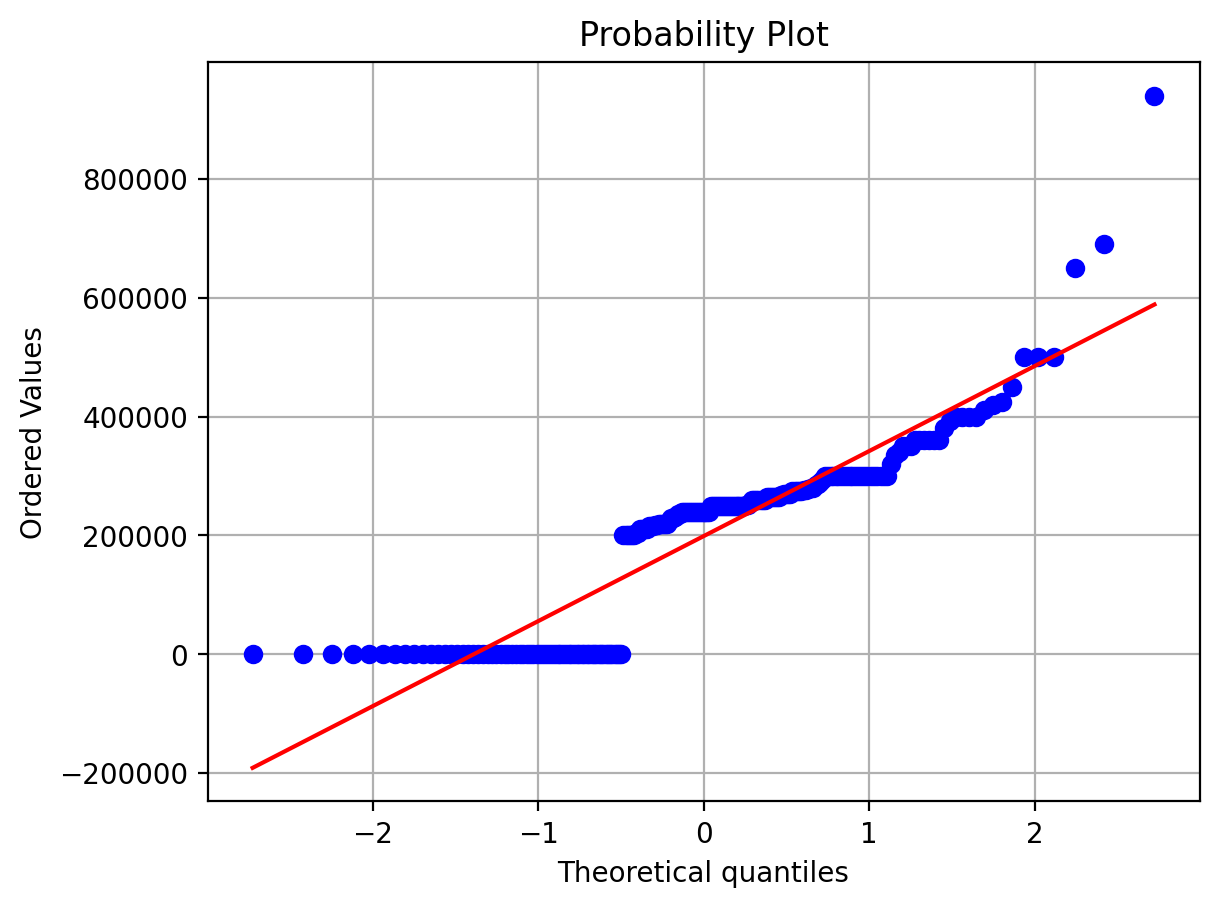

In [24]:
# QQ plot
stats.probplot(df['salary'], dist='norm', plot = plt)
plt.grid();

### Intution:
* The feature `salary` is not following normal distibution since majority of the data points are not falling on the 45 degree line of QQ plot.
* We can also observe that there are some outliers in our salary feature

## Check for outliers

### Skewness:
**Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed.**


* Less than -1 or greater than 1, then the distribution is highly skewed.
* Between -1 and -0.5 or 0.5 and 1, then the distribution is moderately skewed.
* Between -0.5 and 0.5, then the distribution is approx. symmetric.
* When skewness = 0, then the data is perfrctly symmetric.

In [25]:
# check for the Skewness to see if there are any presence of outliers:
df.skew()

ssc_p      -0.132649
hsc_p       0.163639
degree_p    0.244917
etest_p     0.282308
mba_p       0.313576
salary      0.446646
dtype: float64

### Intution:
* As we can observe skewness of all the numerical features are in the accepted range of skew (which -0.5 to 0.5 approx symmetric)
> Yet it's better to conform through VIZ.

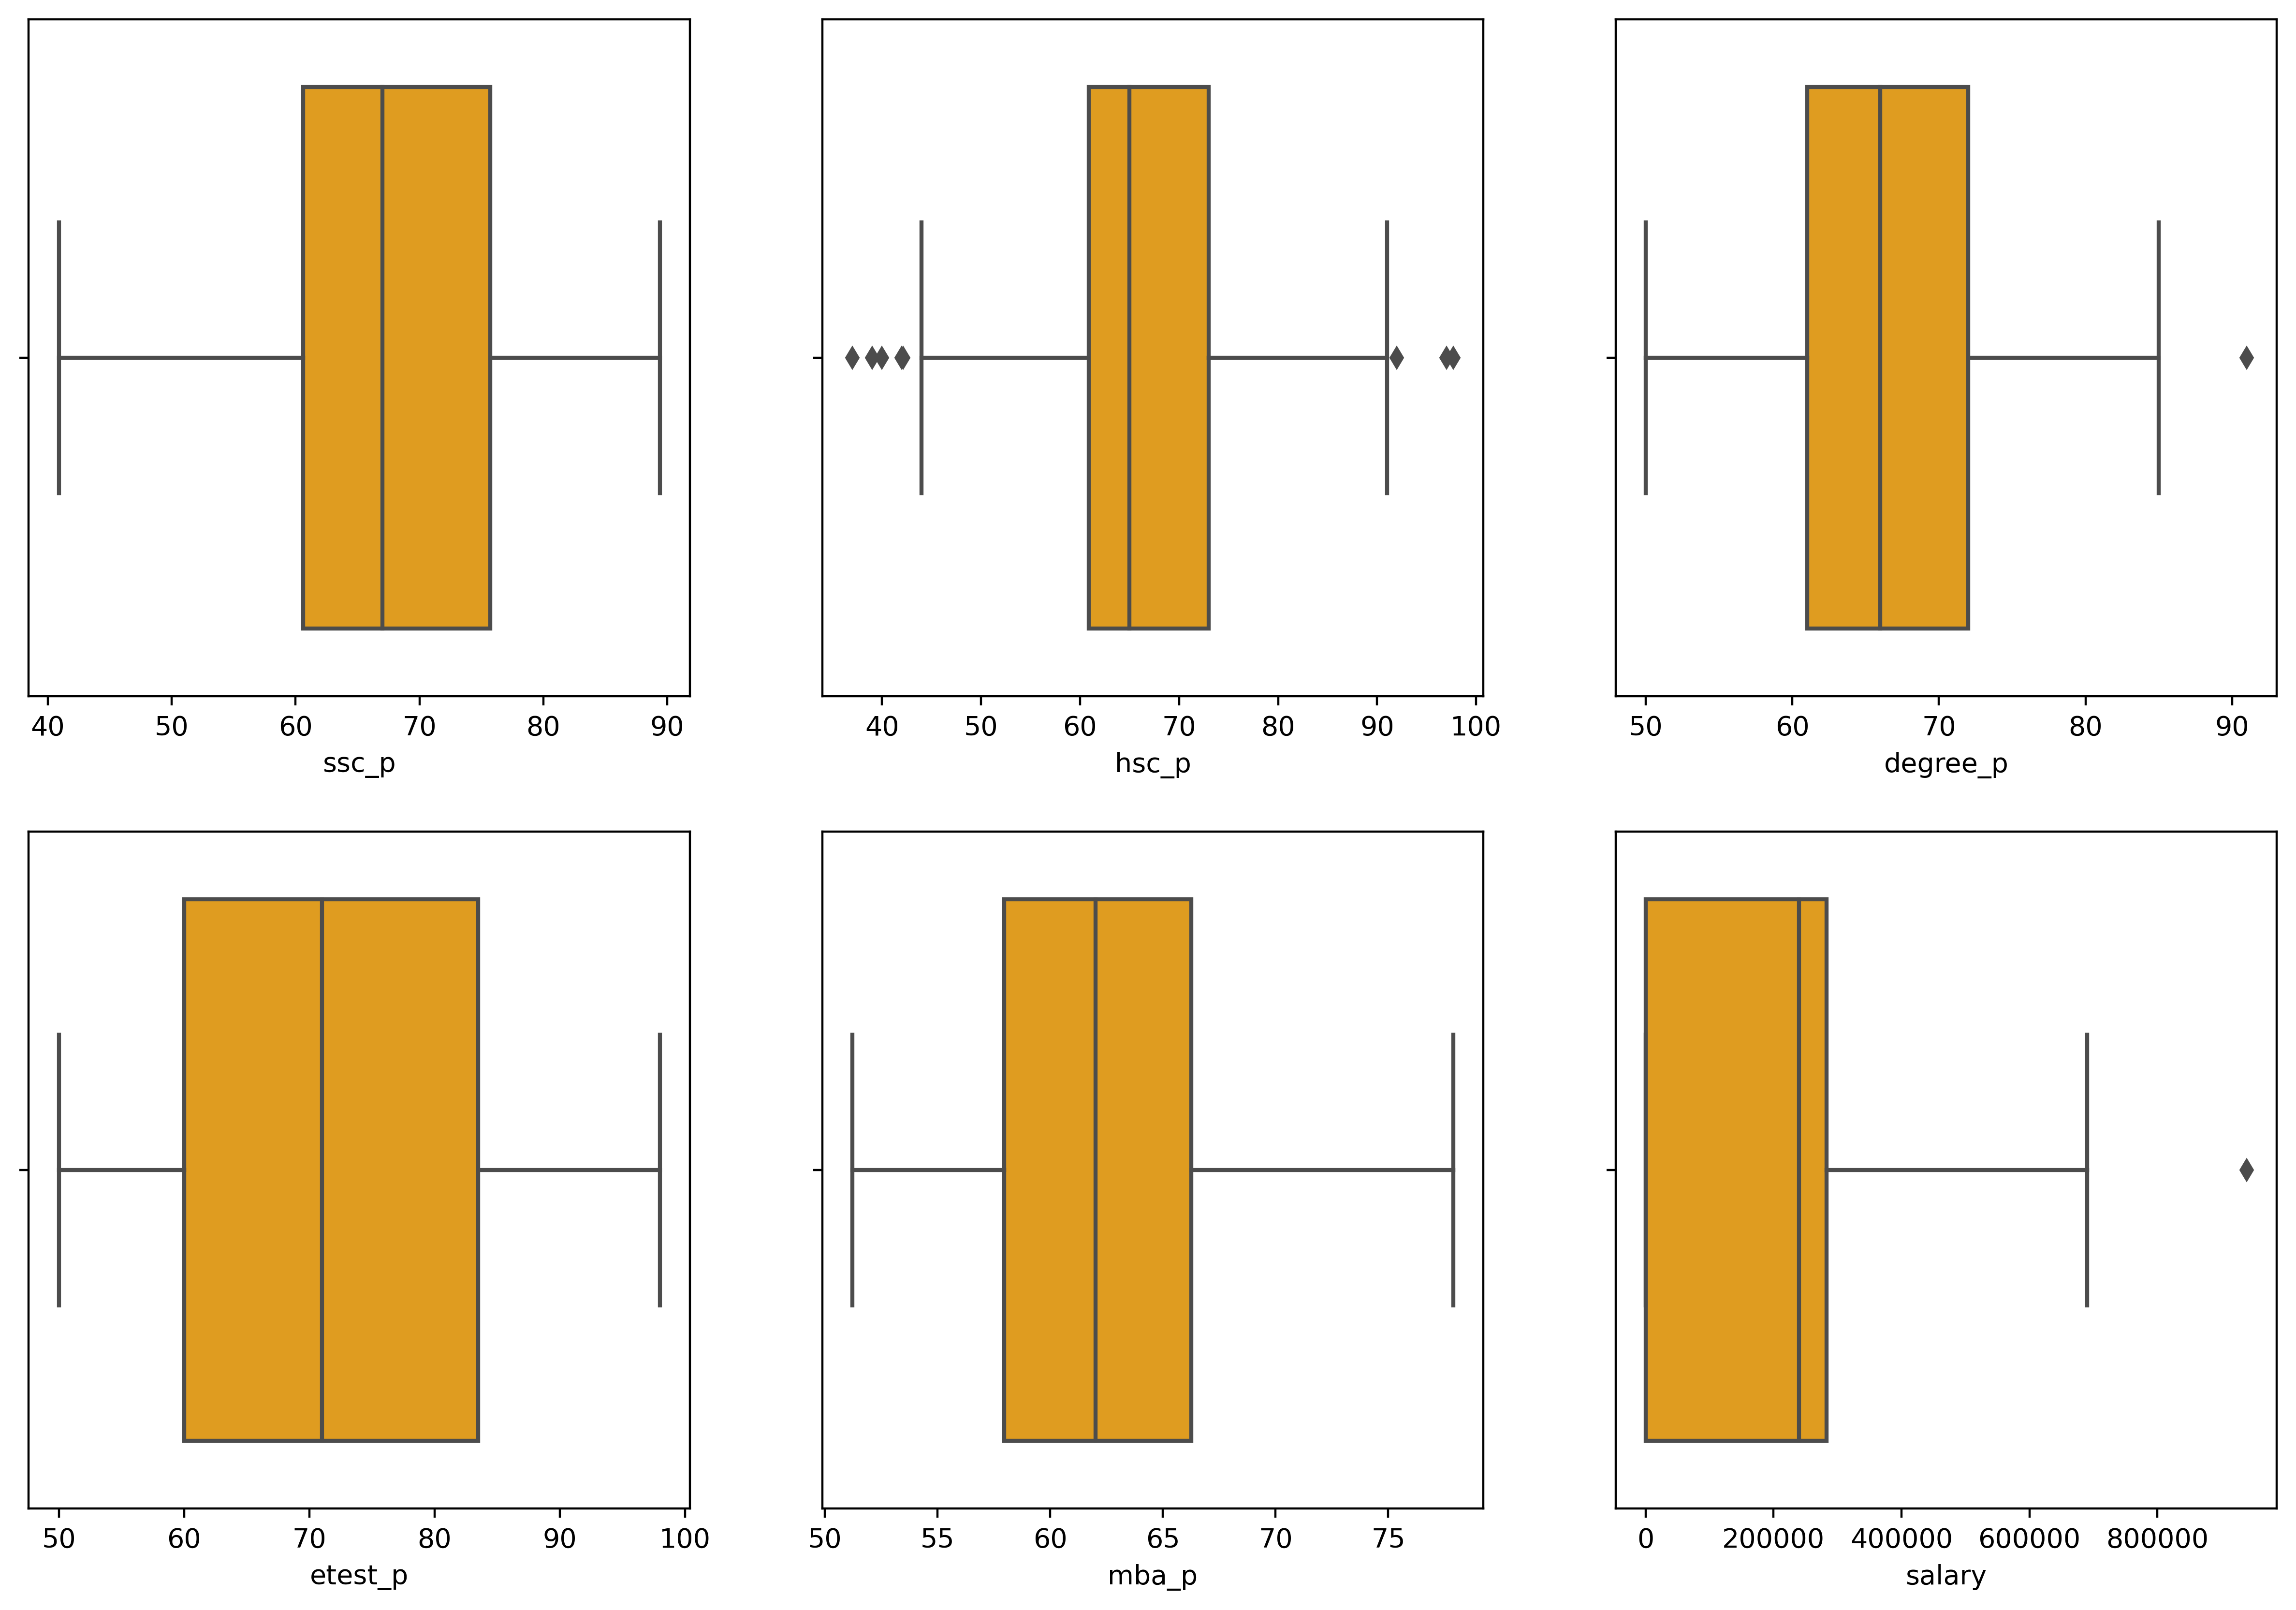

In [26]:
## Box plot
plt.figure(figsize=(15,10), dpi = 200)
plt.subplot(231)
sns.boxplot(x = 'ssc_p', data = df, color = 'orange')
plt.subplot(232)
sns.boxplot(x = 'hsc_p', data = df, color = 'orange')
plt.subplot(233)
sns.boxplot(x = 'degree_p', data = df, color = 'orange')
plt.subplot(234)
sns.boxplot(x = 'etest_p', data = df, color = 'orange')
plt.subplot(235)
sns.boxplot(x = 'mba_p', data = df, color = 'orange')
plt.subplot(236)
sns.boxplot(x = 'salary', data = df, color = 'orange');

In [27]:
df[(df.salary>900000) | (df.degree_p>90)]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,M,60.80,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
197,F,83.96,Others,53.0,Others,Science,91.0,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed,260000.0


### Intution:
* Features `salary` , `degree_p` are having only one outlier each. The outlier present in salary is actually an outlier.
* Feature `hsc_p` having few outliers, In reality they are not outliers(cause the percentage of a student an be lower then 40% and can be as high as above 90%.

## Outlier Treatment

In [28]:
df_final = df[df.salary<800000] # Dropping the outlier

In [29]:
df_final.reset_index(inplace = True)

In [30]:
df_final.drop('index', axis =1, inplace = True)

In [31]:
df_final

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
210,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
211,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
212,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Bivariate Analysis

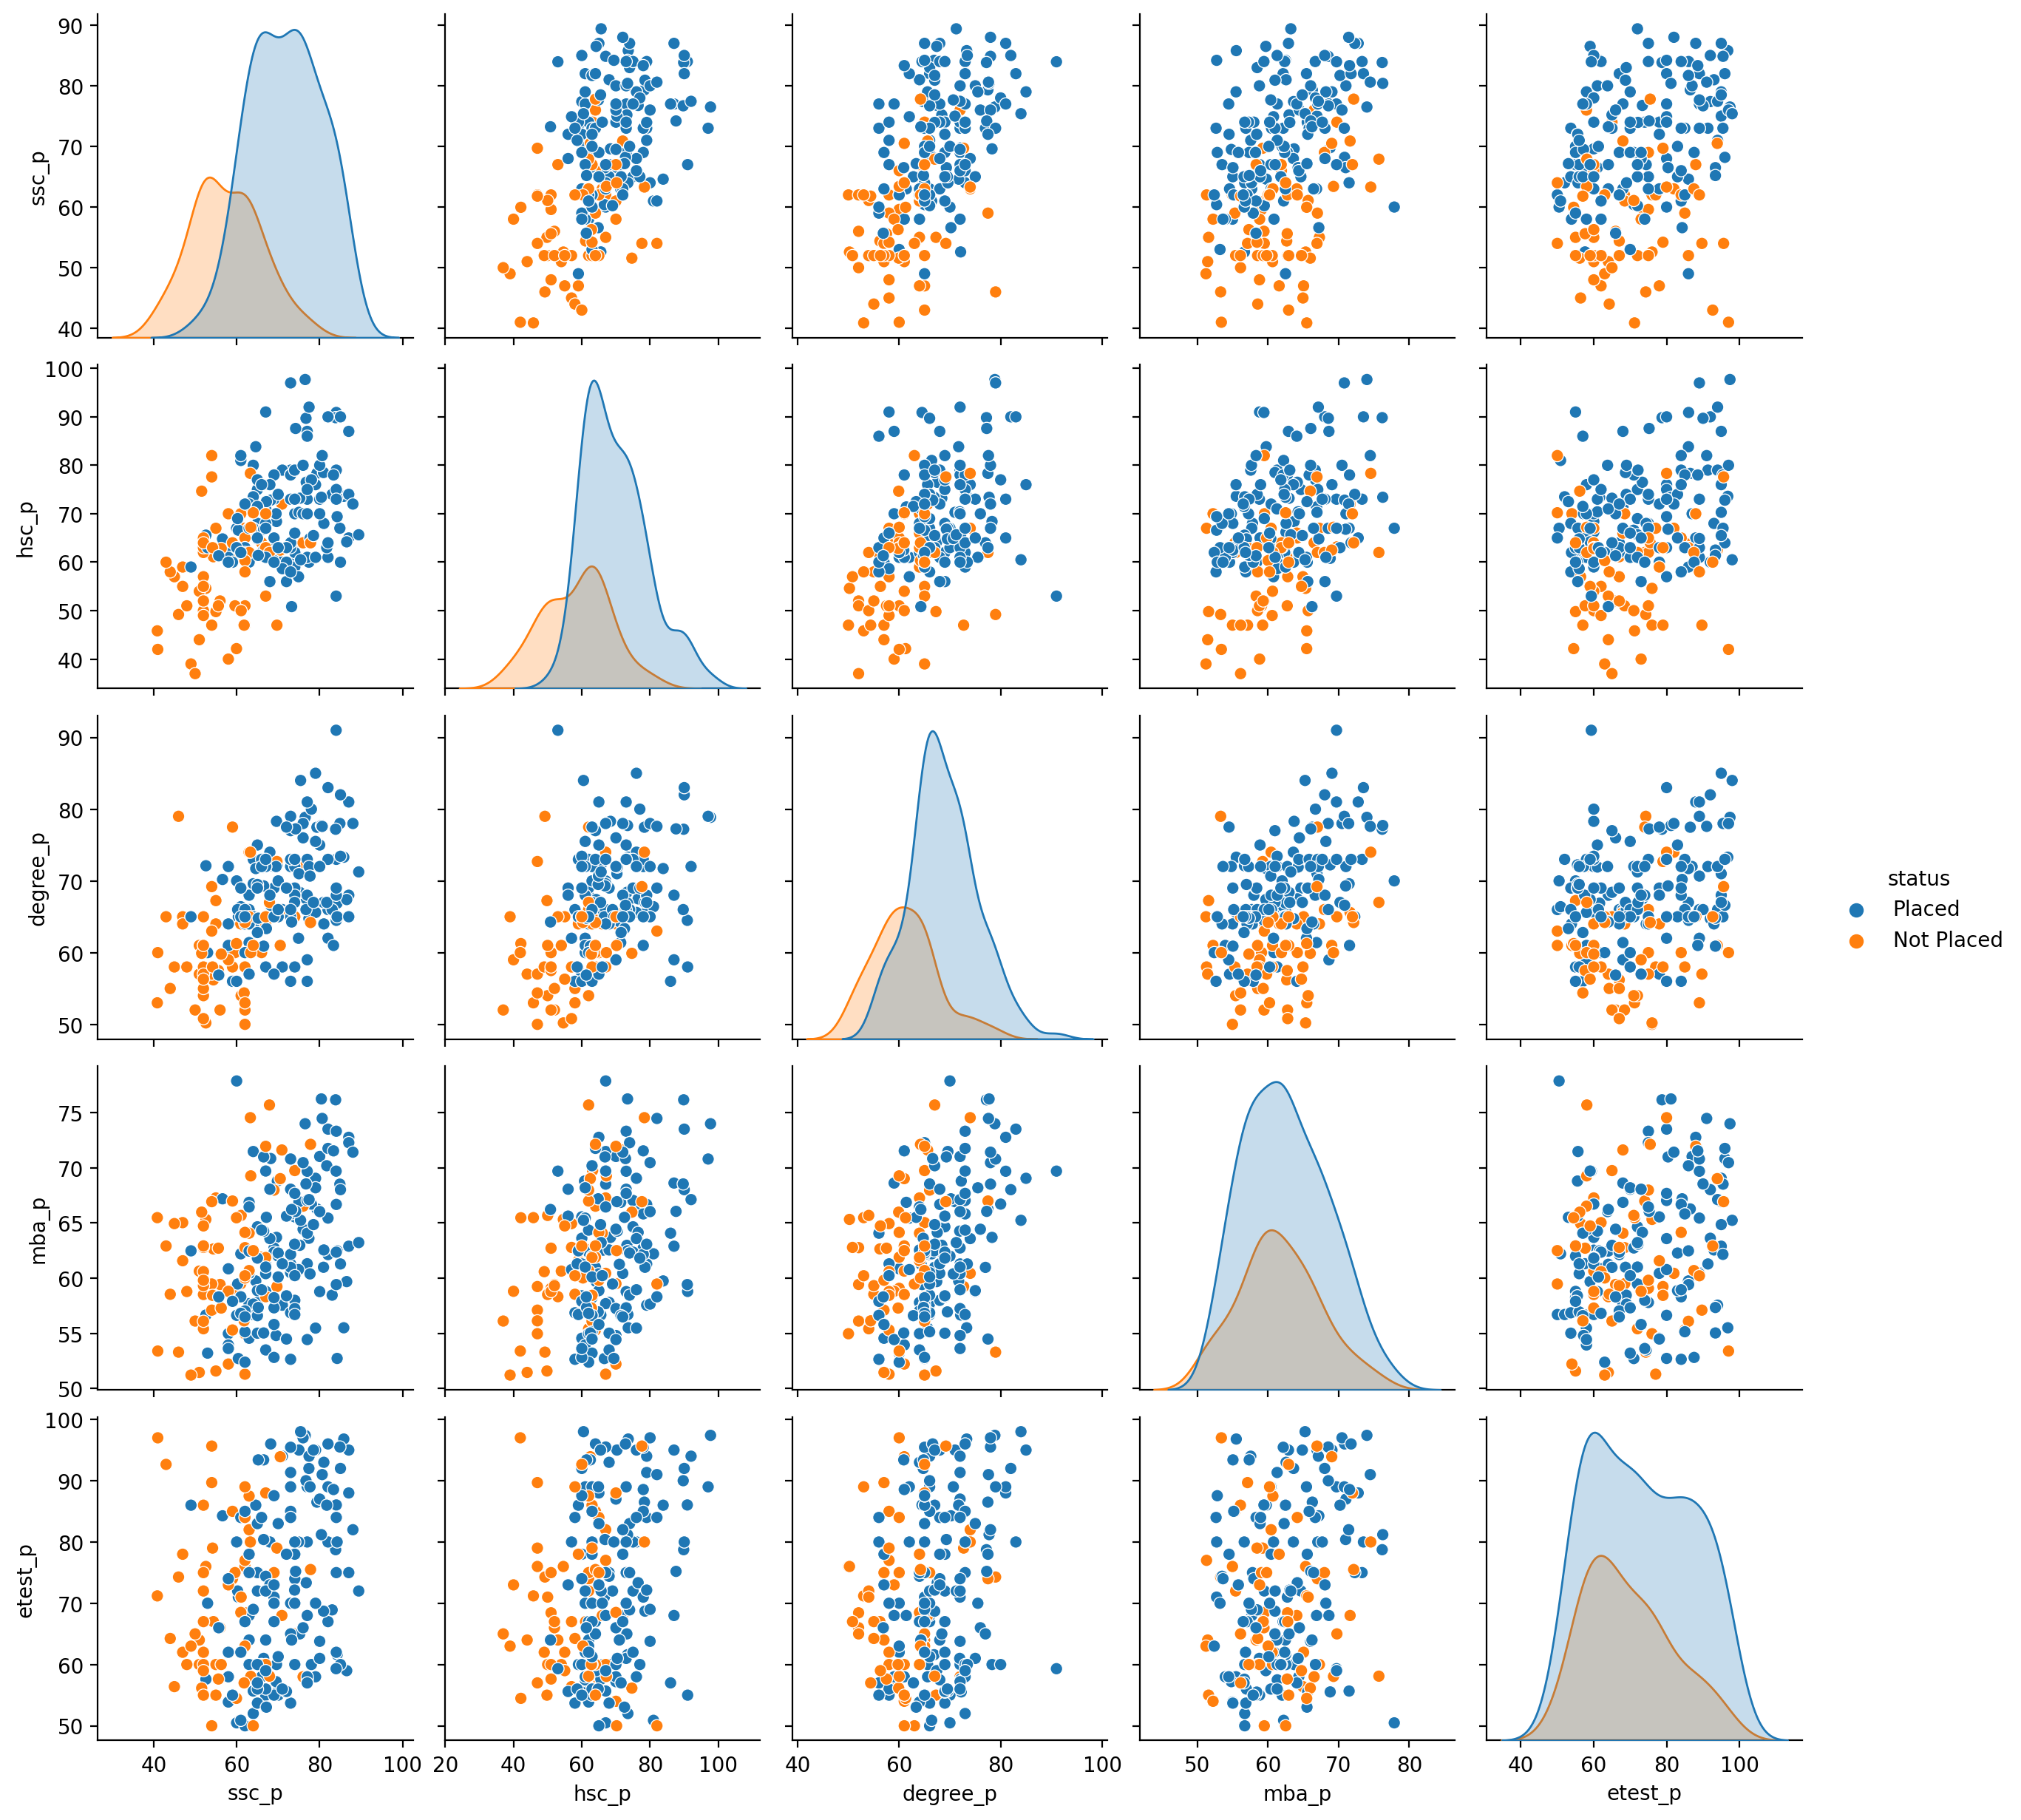

In [32]:
# Distribution of the data
sns.pairplot(df_final,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status");

In [33]:
#pip install plotly
#pip install plotly_express
import plotly_express as px
gapminder=px.data.gapminder()
px.scatter(df_final,x="mba_p",y="etest_p",color="status",facet_col="workex");

In [34]:
df_final.to_csv('df_final.csv')

## Check for multi-collinearity

In [35]:
df_final.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Label Encoding

In [36]:
df_final.status = df_final.status.map({'Placed':1, 'Not Placed':0})
df_final.ssc_b = df_final.ssc_b.map({'Central':1, 'Others':0})
df_final.hsc_b = df_final.hsc_b.map({'Central':1, 'Others':0})
df_final.hsc_s = df_final.hsc_s.map({'Commerce':1, 'Science':2,'Arts':3})
df_final.degree_t = df_final.degree_t.map({'Comm&Mgmt':1, 'Sci&Tech':2,'Others':3})
df_final.workex = df_final.workex.map({'Yes':1, 'No':0})
df_final.specialisation = df_final.specialisation.map({'Mkt&HR':1, 'Mkt&Fin':0})
df_final.gender = df_final.gender.map({'M':1, 'F':0})

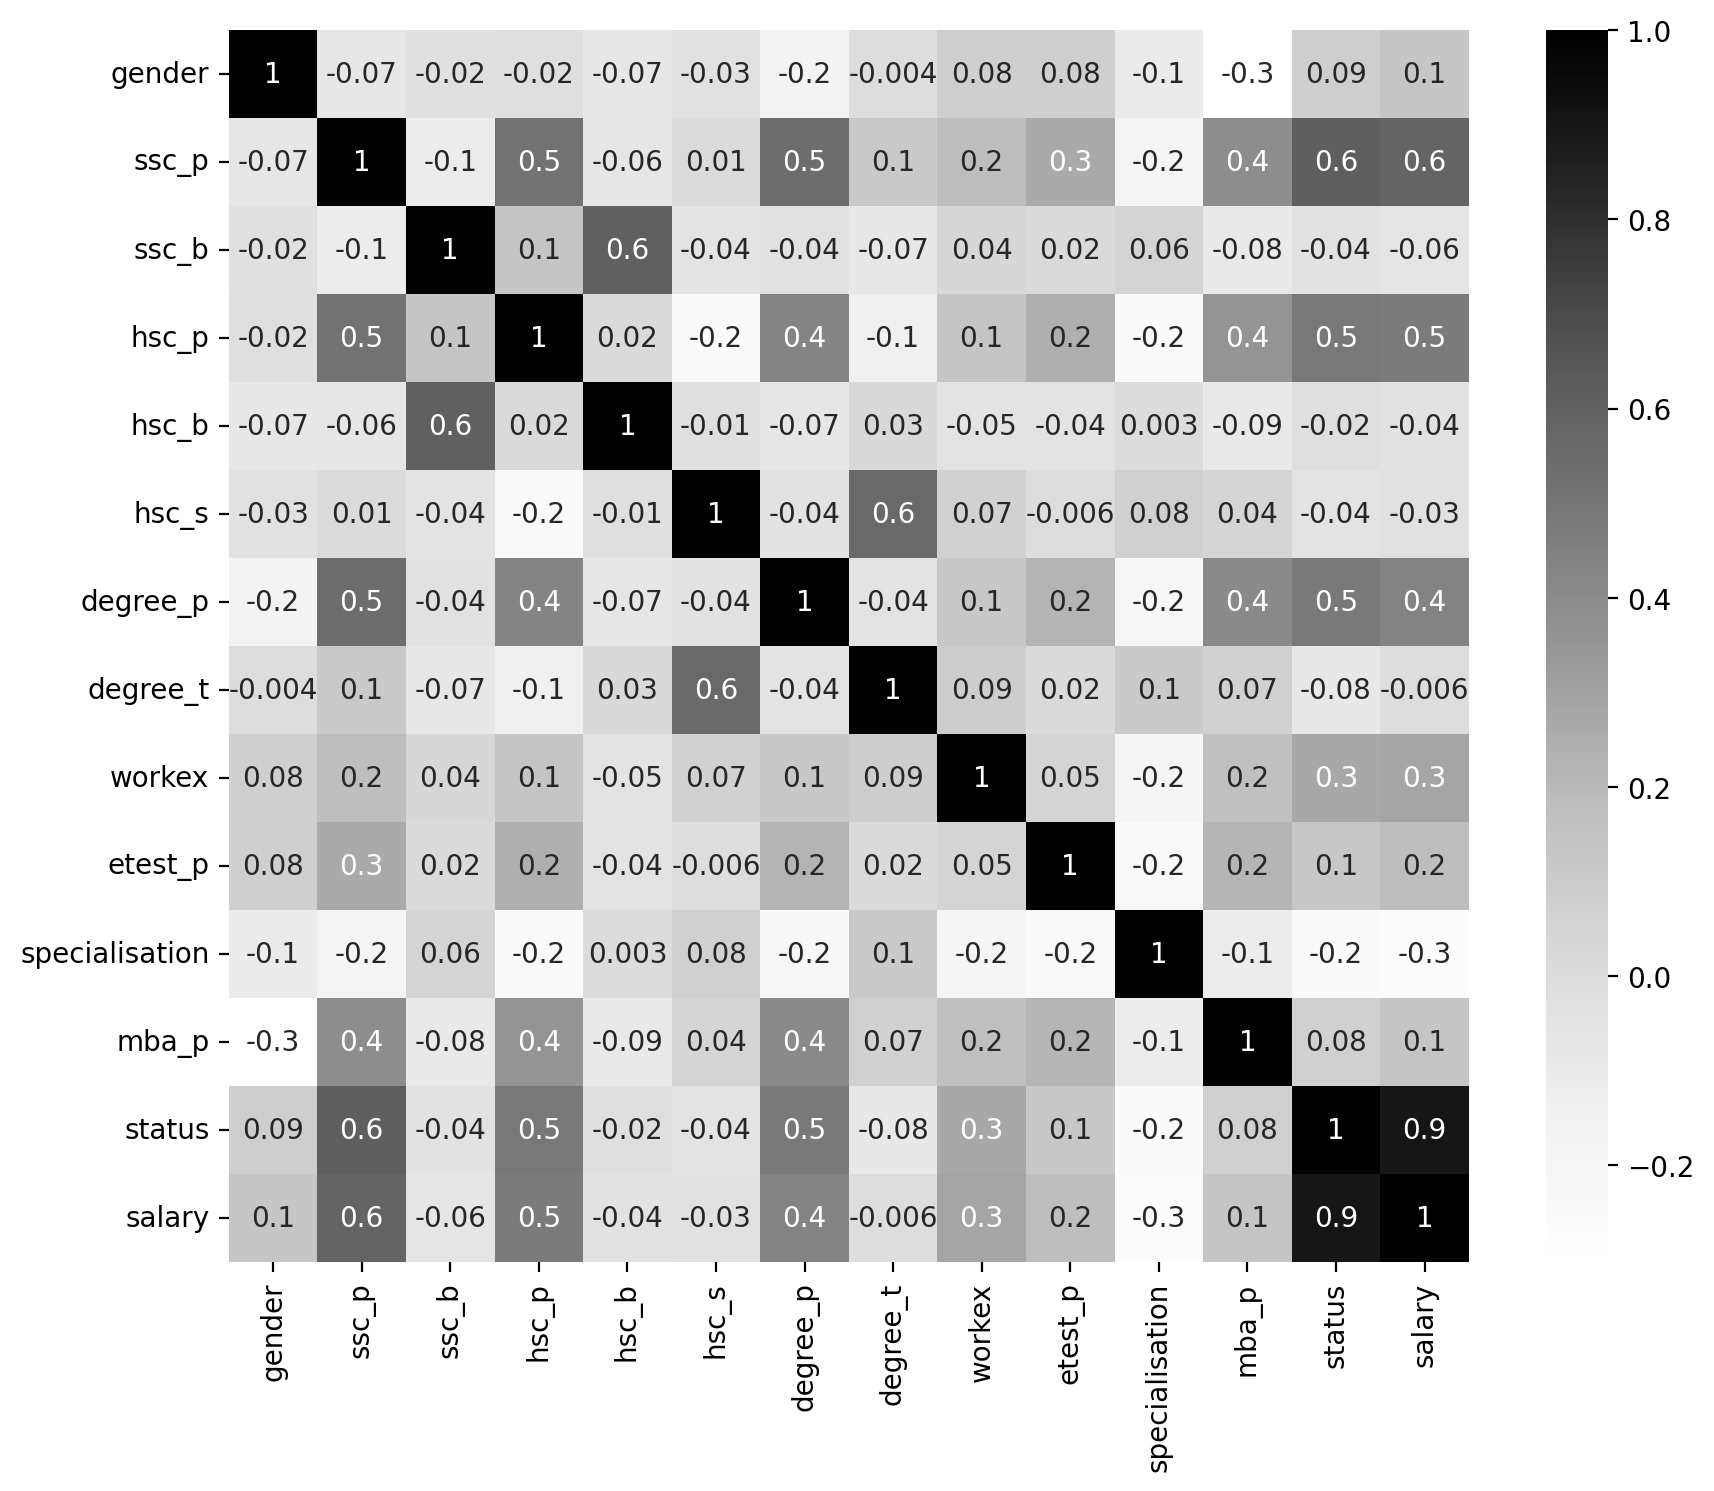

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df_final.corr(),annot=True,fmt='.1g',cmap='Greys');

## Observations:
* We can see that some of our input features are collinear to each other (we have a problem of multi-collinearity), we need to remove the features which are highly collinear to each other.

## Multi-collinearity treatment

In [41]:
y=df_final['status']
X=df_final[['ssc_p','hsc_p', 'degree_p', 'etest_p','mba_p','salary','gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']] 

In [42]:
# splitting the historical data into train and test.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=27)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
X_train.dtypes

ssc_p             float64
hsc_p             float64
degree_p          float64
etest_p           float64
mba_p             float64
salary            float64
gender              int64
ssc_b               int64
hsc_b               int64
hsc_s               int64
degree_t            int64
workex              int64
specialisation      int64
dtype: object

## Variance Inflation Factor

In [45]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

,features,VIF
0,ssc_p,83.47
1,hsc_p,77.77
2,degree_p,111.88
3,etest_p,37.76
4,mba_p,155.75
5,salary,5.56
6,gender,2.66
7,ssc_b,4.00
8,hsc_b,2.82
9,hsc_s,11.81


## Observations: 
* According to variance inflation factor the VIF score of a feature above 10 is considered as highly collinear feature
* 5 to 10 is moderate collinear and below 5 is low collinear
* We can see that the features `salary,gender,ssc_b,hsc_b,workex,specialisation` are low collinear features and `degree_t` is moderately corelated.
* The remaining features are highly collinear to each other according to VIF.

## REF - Recursive Feature Elimination

In [46]:
from sklearn.linear_model import LinearRegression

regressor_temp = LinearRegression()

In [47]:
from sklearn.feature_selection import RFE

rfe = RFE(regressor_temp, n_features_to_select=7)

rfe = rfe.fit(X_train, y_train)

In [48]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df

,Columns,Included,Ranking
0,ssc_p,True,1
1,hsc_p,False,3
2,degree_p,False,4
3,etest_p,False,6
4,mba_p,False,2
5,salary,False,7
6,gender,True,1
7,ssc_b,True,1
8,hsc_b,True,1
9,hsc_s,True,1


## Observations: 
* REF - Recurssive Feature Elimination provides us a support (True meaning the feature is important , False meaning the feature is not important), it also provide us Ranking( for support True rank -1 , else rank consecutively).
* We can see that the features `ssc_p,salary,gender,ssc_b,hsc_b,workex,hsc_s,degree_t` are important features.

## Conclusion:
* Comparing both VIF and REF the features that i have considered are 

> `ssc_p,salary,gender,ssc_b,hsc_b,workex,hsc_s,degree_t,specialisation`

## ML Model Building Using the best features obtained from VIF and REF

In [49]:
data = pd.read_csv(r"C:\Users\GUDLA RAGUWING\Data Science Course\Deep Learning\Projects\df_final.csv")

In [50]:
data.drop('Unnamed: 0',axis = 1, inplace = True)

In [51]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [52]:
data.status.value_counts(normalize=True)

Placed        0.686916
Not Placed    0.313084
Name: status, dtype: float64

## Segregation of input and output

In [53]:
y=data['status']
X=data[['ssc_p','salary','gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']] 

In [54]:
y = y.map({'Placed':1, 'Not Placed':0})

## Spliting the data

In [55]:
# splitting the historical data into train and test.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=27)

## Separating Categorical and Numerical Columns for both Train and Test data:

In [56]:
X_train_categorical = X_train.select_dtypes(include = ['object']) # segregating the object feature 

In [57]:
X_train_categorical.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
163,F,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin
117,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin
116,M,Central,Central,Commerce,Comm&Mgmt,Yes,Mkt&Fin
173,M,Others,Others,Science,Sci&Tech,Yes,Mkt&Fin
103,M,Central,Central,Science,Sci&Tech,Yes,Mkt&HR


In [58]:
X_train_numerical = X_train.select_dtypes(include = ['int64', 'float64']) # segregating the Numerical feature

In [59]:
X_train_numerical.head()

,ssc_p,salary
163,67.16,250000.0
117,77.00,240000.0
116,68.20,300000.0
173,73.24,500000.0
103,73.00,240000.0


In [60]:
X_test_categorical = X_test.select_dtypes(include = ['object'])

In [61]:
X_test_categorical.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
128,M,Central,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin
77,M,Others,Others,Science,Sci&Tech,Yes,Mkt&Fin
202,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR
109,M,Central,Others,Science,Sci&Tech,Yes,Mkt&HR
176,F,Central,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin


In [62]:
X_test_numerical = X_test.select_dtypes(include = ['int64', 'float64'])

In [63]:
X_test_numerical.head()

,ssc_p,salary
128,76.70,250000.0
77,64.00,500000.0
202,55.68,260000.0
109,52.00,0.0
176,73.00,650000.0


### Data preparation on train data:
- **For Numerical Variables - `Standardization` or `Normalization` (Fit and
Transform)**

In [64]:
# scaling the numerical features on the Training Data
from sklearn.preprocessing import StandardScaler

Std_scaler = StandardScaler()

# feature names will be (annoyingly) lost after Scaling the data
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_numerical_trns = pd.DataFrame(Std_scaler.fit_transform(X_train_numerical),
                                     columns = X_train_numerical.columns,
                                     index = X_train_numerical.index)
X_train_numerical_trns.head()

,ssc_p,salary
163,-0.061145,0.435792
117,0.845490,0.363477
116,0.034678,0.797366
173,0.499052,2.243662
103,0.476939,0.363477


In [65]:
X_test_numerical_trns = pd.DataFrame(Std_scaler.fit_transform(X_test_numerical),
                                     columns = X_test_numerical.columns,
                                     index = X_test_numerical.index)
X_test_numerical_trns.head()

,ssc_p,salary
128,1.082511,0.190667
77,-0.132591,1.640221
202,-0.928626,0.248649
109,-1.280718,-1.258887
176,0.728505,2.509954


- **For Categorical - `LabelEncoding` or `OneHotEncoding` (Choose wisely)**

In [66]:
# Applying the OneHotEncoding on the categorical columns 

from sklearn.preprocessing import OneHotEncoder

encoder_ohe = OneHotEncoder(drop='first', sparse=False)

# feature names will be (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_ohe.fit_transform(X_train_categorical), 
                               columns=encoder_ohe.get_feature_names_out(X_train_categorical.columns), 
                               index = X_train_categorical.index)

X_train_cat_ohe.head()

,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
163,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
117,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
116,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
173,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
103,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


In [67]:
X_test_cat_ohe = pd.DataFrame(encoder_ohe.fit_transform(X_test_categorical), 
                               columns=encoder_ohe.get_feature_names_out(X_test_categorical.columns), 
                               index = X_test_categorical.index)

X_test_cat_ohe.head()

,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
128,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
77,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
202,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
109,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
176,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [68]:
X_train_transform = pd.concat([X_train_numerical_trns,X_train_cat_ohe], axis = 1)
X_train_transform.head()

,ssc_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
163,-0.061145,0.435792,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
117,0.845490,0.363477,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
116,0.034678,0.797366,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
173,0.499052,2.243662,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
103,0.476939,0.363477,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


In [69]:
X_test_transform = pd.concat([X_test_numerical_trns,X_test_cat_ohe], axis = 1)
X_test_transform.head()

,ssc_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
128,1.082511,0.190667,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
77,-0.132591,1.640221,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
202,-0.928626,0.248649,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
109,-1.280718,-1.258887,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
176,0.728505,2.509954,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [70]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier()
cls.fit(X_train_transform, y_train)

RandomForestClassifier()

## Residual Analysis on Training Data

In [71]:
y_train_pred = cls.predict(X_train_transform)

In [72]:
from sklearn import metrics

In [73]:
print(metrics.f1_score(y_train_pred, y_train))

1.0


In [74]:
print(metrics.confusion_matrix(y_train_pred,y_train))

[[ 54   0]
 [  0 117]]


## Prediction

In [76]:
y_test_pred = cls.predict(X_test_transform)

In [77]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
128,1,1
77,1,1
202,1,1
109,0,0
176,1,1
209,1,1
12,0,0
199,1,1
78,1,1
89,1,1


## Evaluation

In [78]:
y_testpred = cls.predict(X_test_transform)

In [79]:
print(metrics.f1_score(y_testpred, y_test))

1.0


In [80]:
print(metrics.confusion_matrix(y_testpred,y_test))

[[13  0]
 [ 0 30]]


In [112]:
cls.feature_importances_

array([0.22811608, 0.6787345 , 0.01013605, 0.00755759, 0.00640517,
       0.00539111, 0.00755801, 0.00363244, 0.00610891, 0.02586097,
       0.02049916])

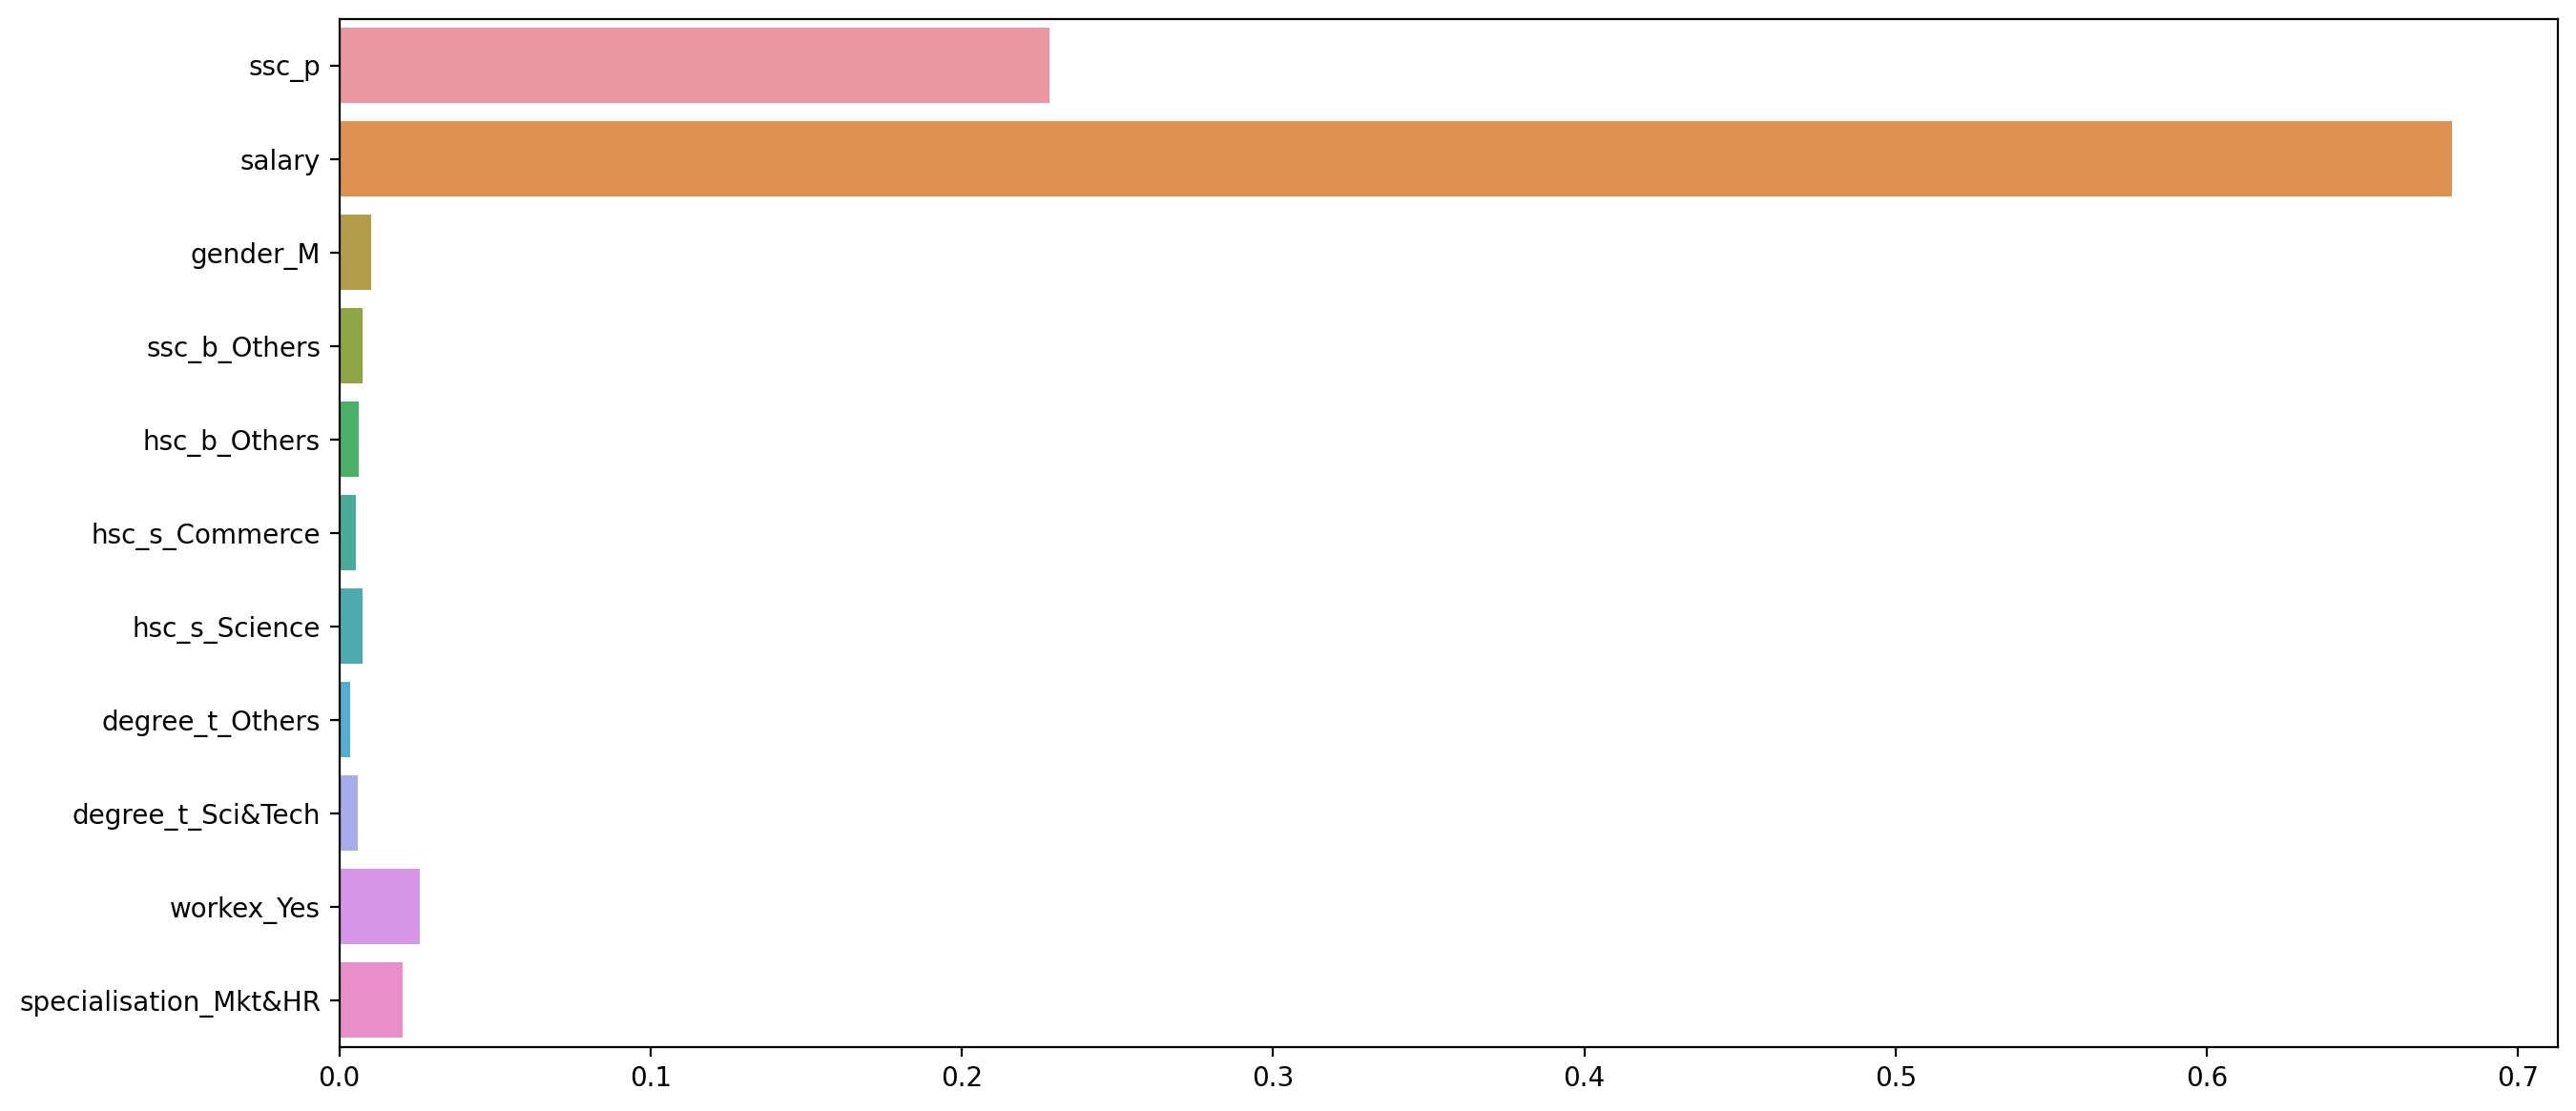

In [113]:
plt.figure(figsize=(15,7))
sns.barplot(x = cls.feature_importances_, y = X_test_transform.columns, )
plt.show();

## Intution:
* Features 'salary' and 'ssc_p' are having high feature importance according to RandomForest-model


## Applying PCA -Principal component analysis

In [120]:
y=df_final['status']
X=df_final[['ssc_p','salary','gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']] 

In [121]:
X.head()
y

,ssc_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
0,67.00,270000.0,1,0,0,1,2,0,1
1,79.33,200000.0,1,1,0,2,2,1,0
2,65.00,250000.0,1,1,1,3,1,0,0
3,56.00,0.0,1,1,1,2,2,0,1
4,85.80,425000.0,1,1,1,1,1,0,0


0      1
1      1
2      1
3      0
4      1
      ..
209    1
210    1
211    1
212    1
213    0
Name: status, Length: 214, dtype: int64

In [122]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(214, 9)


In [123]:
# initializing the pca
from sklearn.decomposition import PCA
pca = PCA()

In [124]:
pca.fit(standardized_data)

PCA()

In [125]:
pca.components_

array([[ 5.21448691e-01,  5.59656105e-01,  1.30698268e-01,
        -2.78274330e-01, -2.59300315e-01,  6.00457441e-02,
         1.02694884e-01,  3.55581305e-01, -3.35456733e-01],
       [-4.86240431e-02, -1.86069017e-01, -7.98329804e-02,
        -2.91836274e-01, -2.39474287e-01,  6.08720449e-01,
         6.06331233e-01, -2.88624526e-02,  2.74067844e-01],
       [ 1.64345635e-01,  1.73139473e-01, -5.87171532e-02,
         5.76682190e-01,  6.09123235e-01,  2.88300781e-01,
         3.15263387e-01,  2.28099621e-01, -3.78719919e-02],
       [-4.19344545e-01, -1.05156903e-01,  8.22101285e-01,
         6.25823706e-02, -3.24548407e-02,  1.10049434e-01,
         5.82766701e-02,  2.66977350e-01, -2.13278767e-01],
       [-3.04882113e-01, -2.93887045e-01, -5.05515400e-01,
        -3.65236202e-02, -8.93365369e-02,  8.11854009e-02,
        -7.79311449e-02,  5.71320170e-01, -4.65559256e-01],
       [ 1.35424130e-04,  5.38526212e-02,  1.09799719e-02,
         1.05874507e-01, -1.60075746e-01, -1.885737

In [126]:
pca.explained_variance_ratio_

array([0.21815476, 0.18061992, 0.17098648, 0.11853146, 0.09346133,
       0.08769952, 0.05159765, 0.04138381, 0.03756506])

In [127]:
np.cumsum(pca.explained_variance_ratio_)

array([0.21815476, 0.39877469, 0.56976116, 0.68829262, 0.78175395,
       0.86945347, 0.92105112, 0.96243494, 1.        ])

In [128]:
np.arange(len(pca.explained_variance_ratio_))

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [129]:
# configuring the parameteres
# number of components = 7
pca_new = PCA(n_components = 7)
pca_new_data = pca_new.fit_transform(standardized_data)

# Lets look at the shape of data after PCA
print("shape = ", pca_new_data.shape)

shape =  (214, 7)


In [130]:
pca_df = pd.DataFrame(data=pca_new_data, columns=("1st_principal", "2nd_principal",'3st_principal','4st_principal',
                                                  '5st_principal','6st_principal','7st_principal'))
pca_df["status"] = y.values

pca_df.head()

,1st_principal,2nd_principal,3st_principal,4st_principal,5st_principal,6st_principal,7st_principal,status
0,0.298426,0.786151,-1.192602,0.061188,-1.493240,0.470043,0.966615,1
1,1.593113,0.647980,1.111701,0.936987,0.505679,0.193235,0.128879,1
2,-0.263851,0.201285,1.665858,0.912009,-0.308534,-1.571467,-2.003527,1
3,-2.254356,1.128390,1.213177,0.926169,-0.760282,-0.063554,0.336130,0
4,1.206196,-2.166858,1.217243,-0.391102,-1.520162,-0.871084,0.066539,1


## DNN model building - using the first 2 initial features of PCA

In [131]:
y=pca_df['status']
X=pca_df[["1st_principal", "2nd_principal"]] 

## Spliting the data into train and test

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
#stratify to preserve the ratio to balance the data

## Building the Architecture

In [133]:
model = Sequential()
model.add(Dense(6,activation='relu',kernel_initializer = 'he_uniform', input_dim = 2))
model.add(Dense(5,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(4,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(2,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [134]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 6)                 18        
                                                                 
 dense_11 (Dense)            (None, 5)                 35        
                                                                 
 dense_12 (Dense)            (None, 4)                 24        
                                                                 
 dense_13 (Dense)            (None, 2)                 10        
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 90
Trainable params: 90
Non-trainable params: 0
_________________________________________________________________


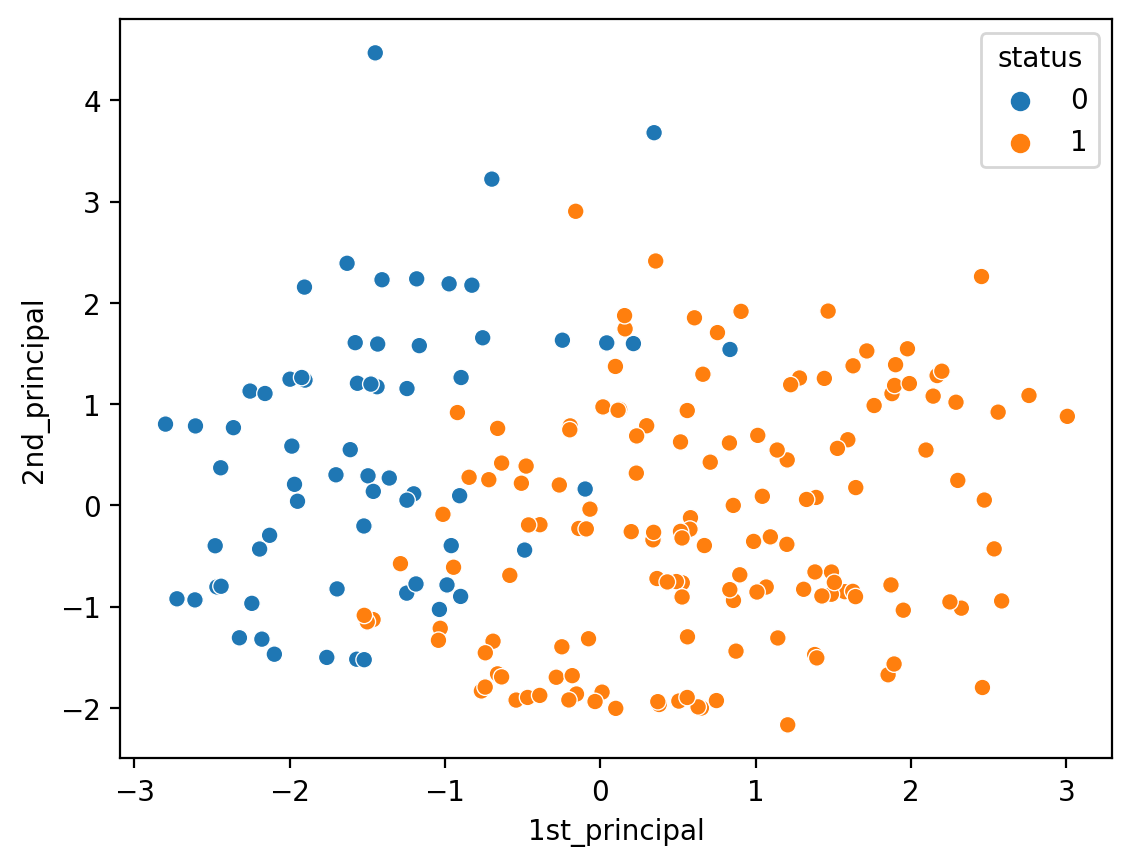

In [135]:
sns.scatterplot(x = '1st_principal', y='2nd_principal',hue = 'status', data =pca_df);

## Compiling the Architecture & Model Creation

In [138]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

## Model Training Phase

In [139]:
history = model.fit(X_train.values,y_train,epochs = 300,validation_split = 0.2 )

Epoch 1/300
5/5 [==============================] - 1s 59ms/step - loss: 0.7453 - accuracy: 0.6985 - val_loss: 0.7729 - val_accuracy: 0.6857
Epoch 2/300
5/5 [==============================] - 0s 12ms/step - loss: 0.7290 - accuracy: 0.6985 - val_loss: 0.7563 - val_accuracy: 0.6857
Epoch 3/300
5/5 [==============================] - 0s 12ms/step - loss: 0.7139 - accuracy: 0.6985 - val_loss: 0.7409 - val_accuracy: 0.6857
Epoch 4/300
5/5 [==============================] - 0s 12ms/step - loss: 0.7003 - accuracy: 0.6985 - val_loss: 0.7269 - val_accuracy: 0.6857
Epoch 5/300
5/5 [==============================] - 0s 12ms/step - loss: 0.6881 - accuracy: 0.6985 - val_loss: 0.7142 - val_accuracy: 0.6857
Epoch 6/300
5/5 [==============================] - 0s 12ms/step - loss: 0.6777 - accuracy: 0.6985 - val_loss: 0.7023 - val_accuracy: 0.6857
Epoch 7/300
5/5 [==============================] - 0s 12ms/step - loss: 0.6666 - accuracy: 0.6985 - val_loss: 0.6916 - val_accuracy: 0.6857
Epoch 8/300
5/5 [===

## Prediction Phase

In [140]:
Y_cap = model.predict(X_test)
Y_cap_f = np.where(Y_cap>0.5,1,0)
Y_cap_f

2/2 [==============================] - 0s 16ms/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]])

## Model Evaluation

In [141]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.8837209302325582

## Ploting the Best Decision Surface Region

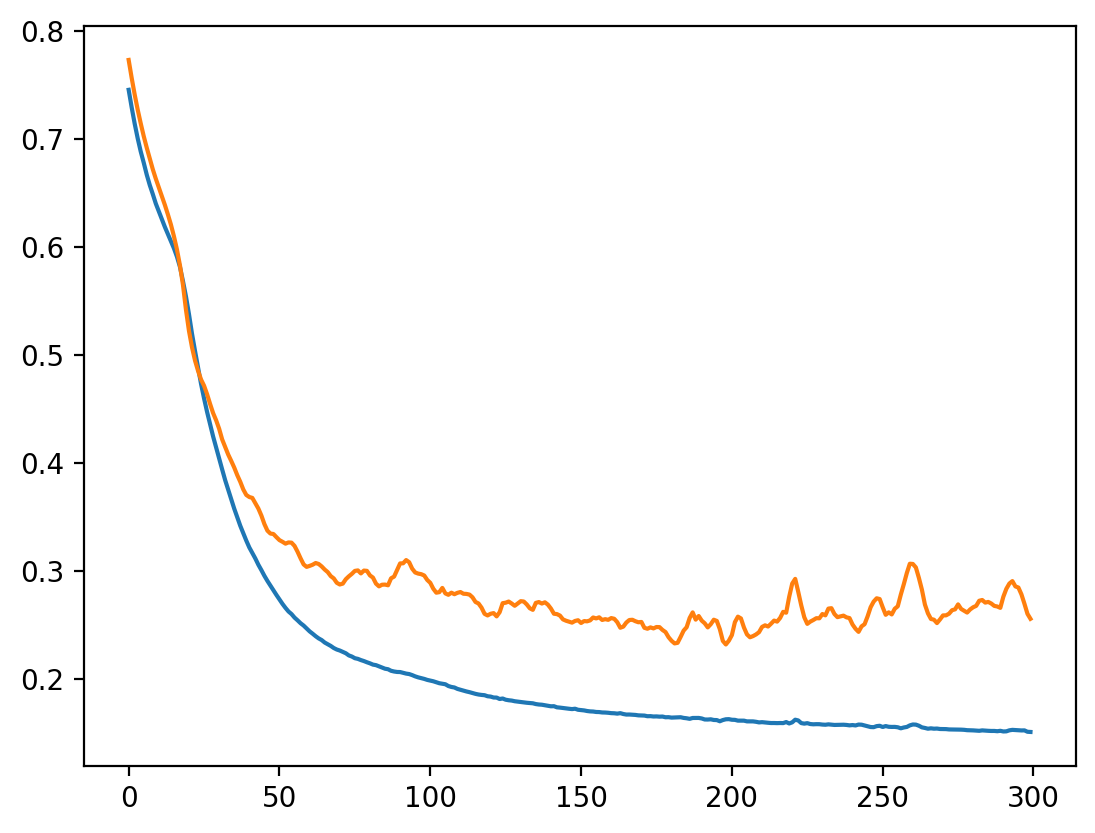

In [142]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [143]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 13s 1ms/step


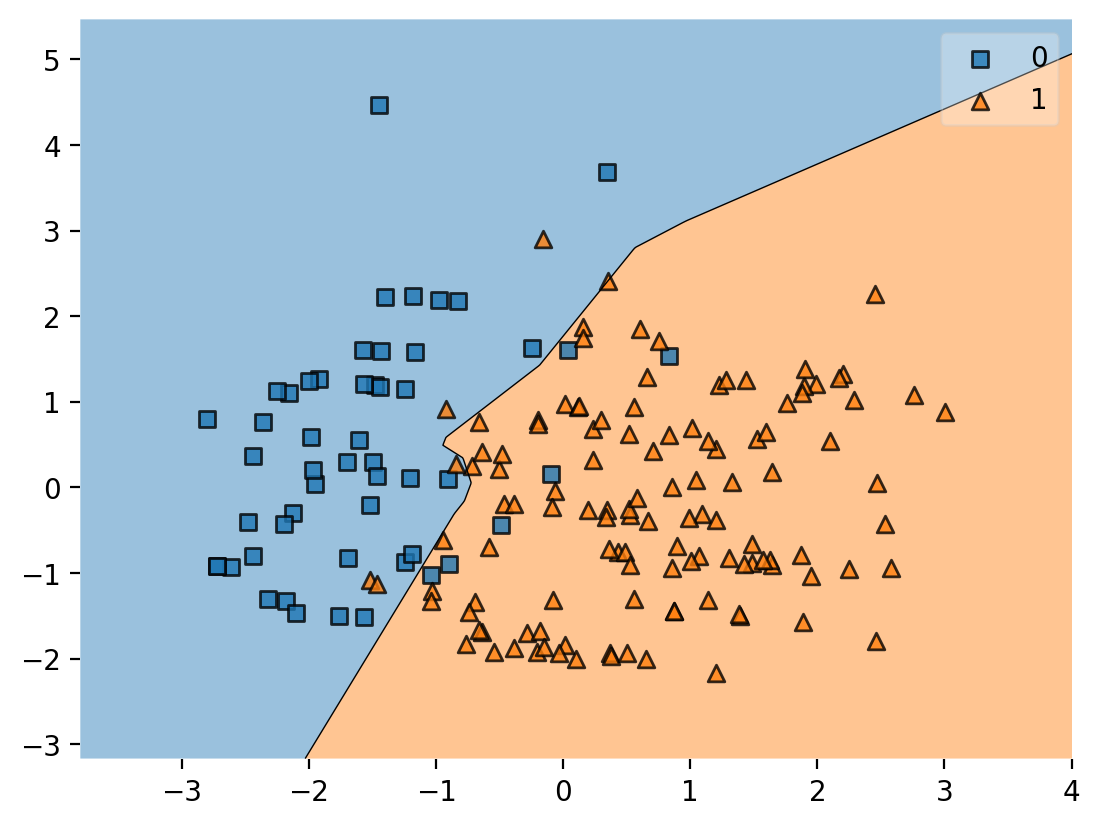

In [144]:
plot_decision_regions(X_train.values, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 13s 1ms/step


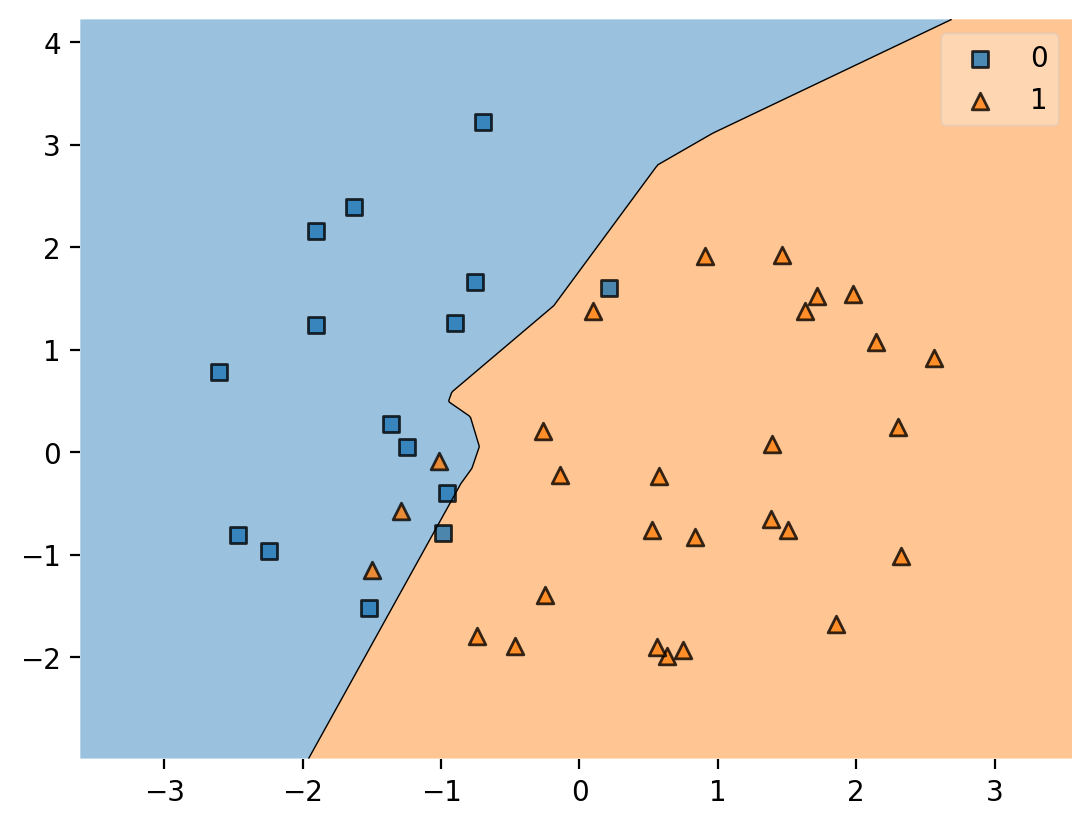

In [145]:
plot_decision_regions(X_test.values, y_test.values.astype(int), clf = model);

## Conclusions:
* THe train score turned out to be `94% and validation score 91%.`
* I have predicted and evaluated the model’s performance, got a score of `88% on the unseen data.`
* There is no overfiting as the train score and the test score almost equal which proves that my model has learned well from the train data and predicted well on the unseen data.
* As we know for a best fit model the train and test score should be as high as possible.

## Additional 
* Plotting the best decision surface with `salary` and `ssc_p` which we got from feature importance by Random forest algorithm

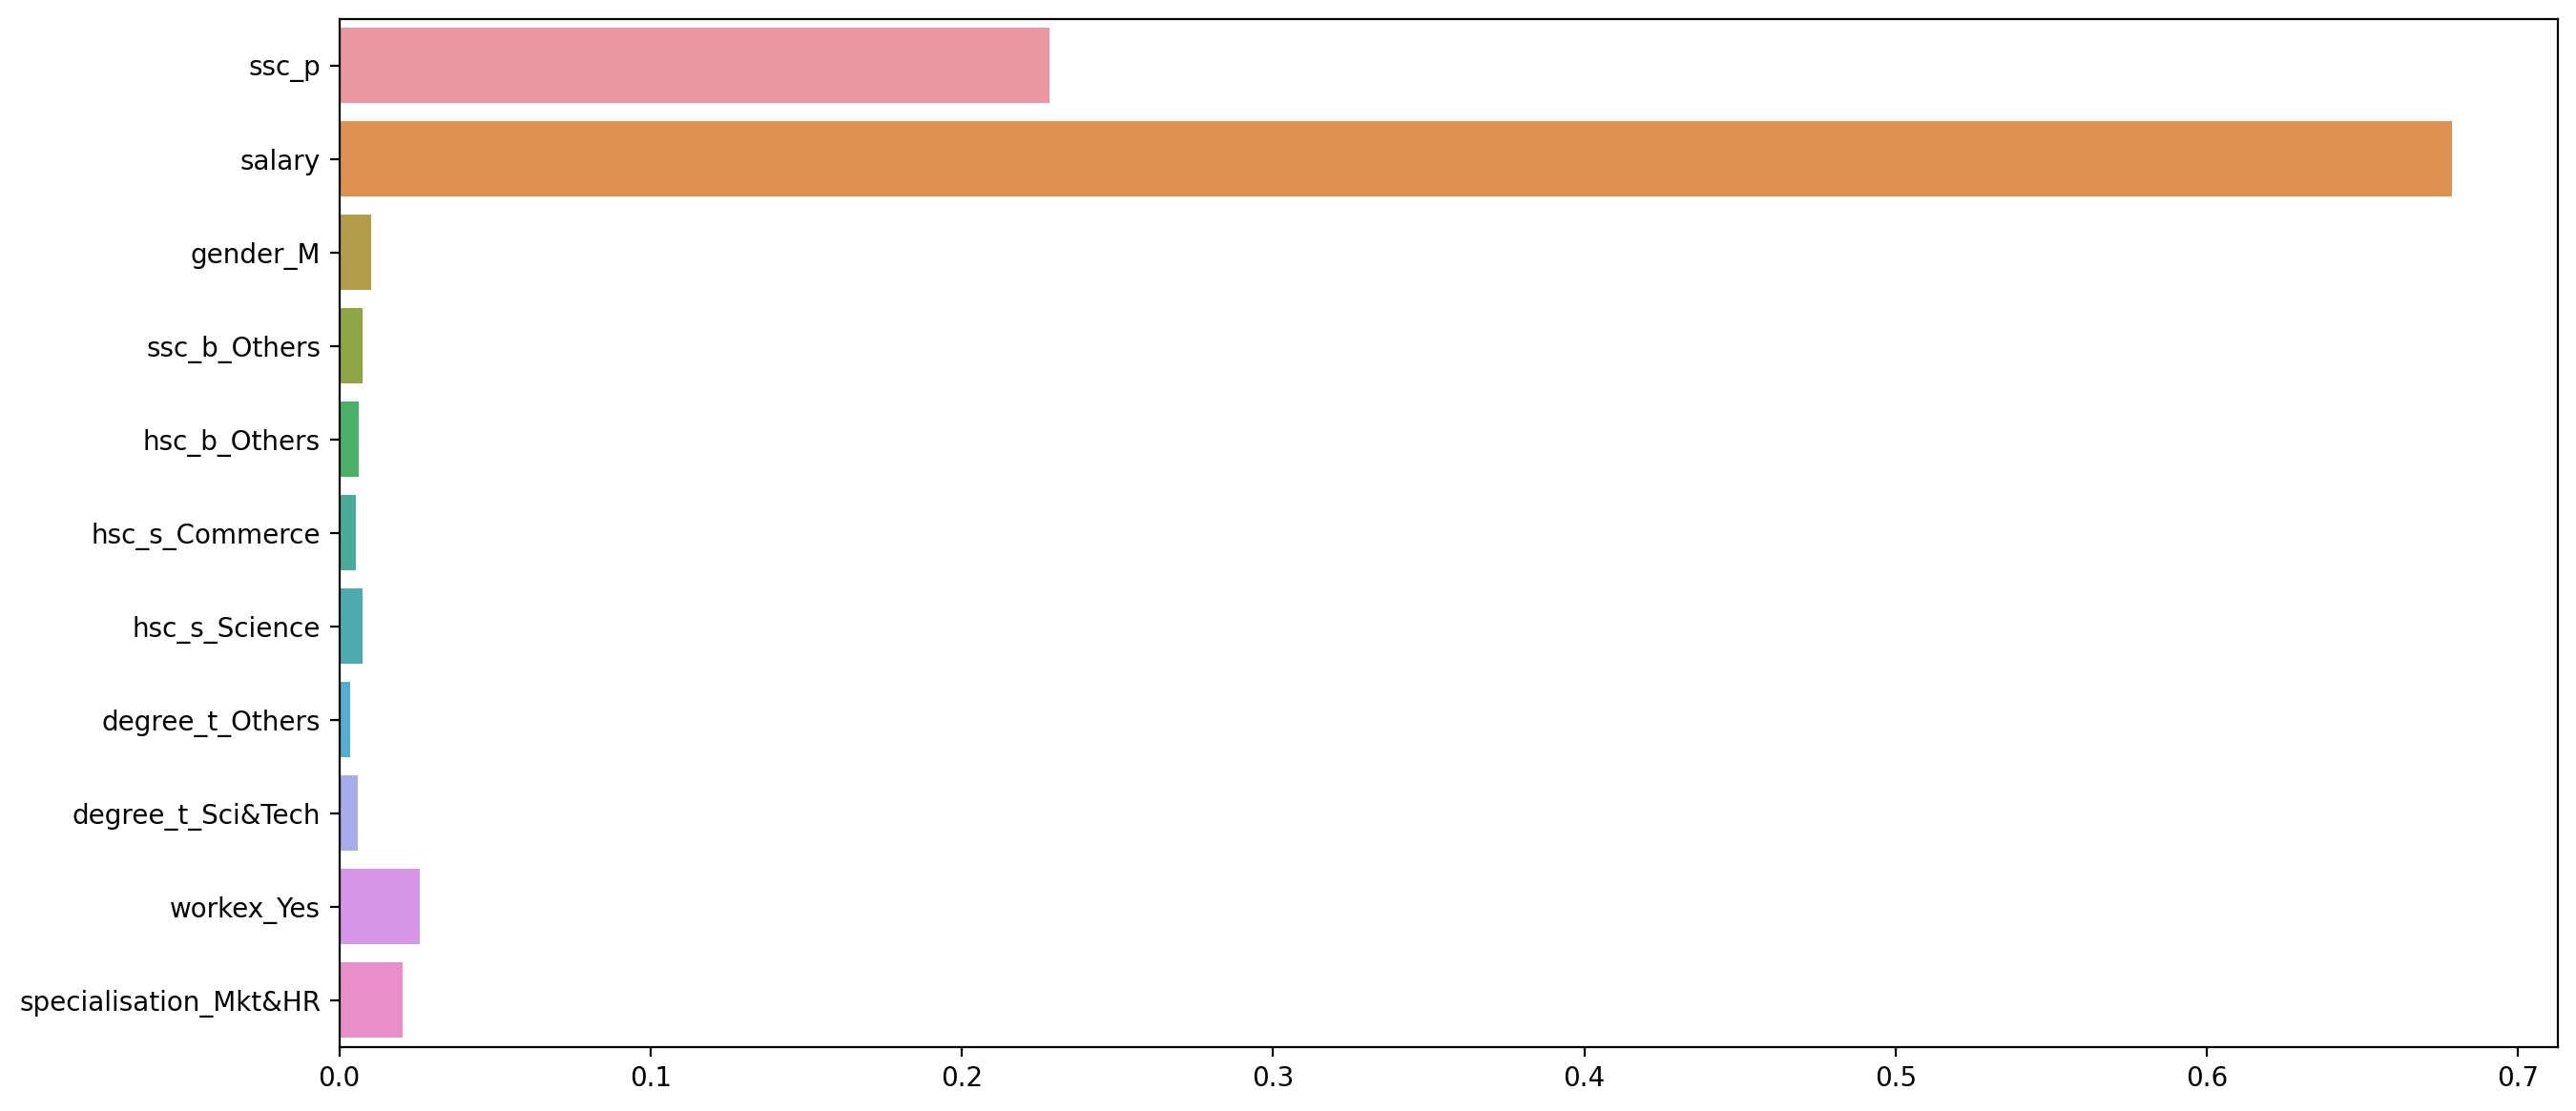

In [146]:
plt.figure(figsize=(15,7))
sns.barplot(x = cls.feature_importances_, y = X_test_transform.columns, )
plt.show();

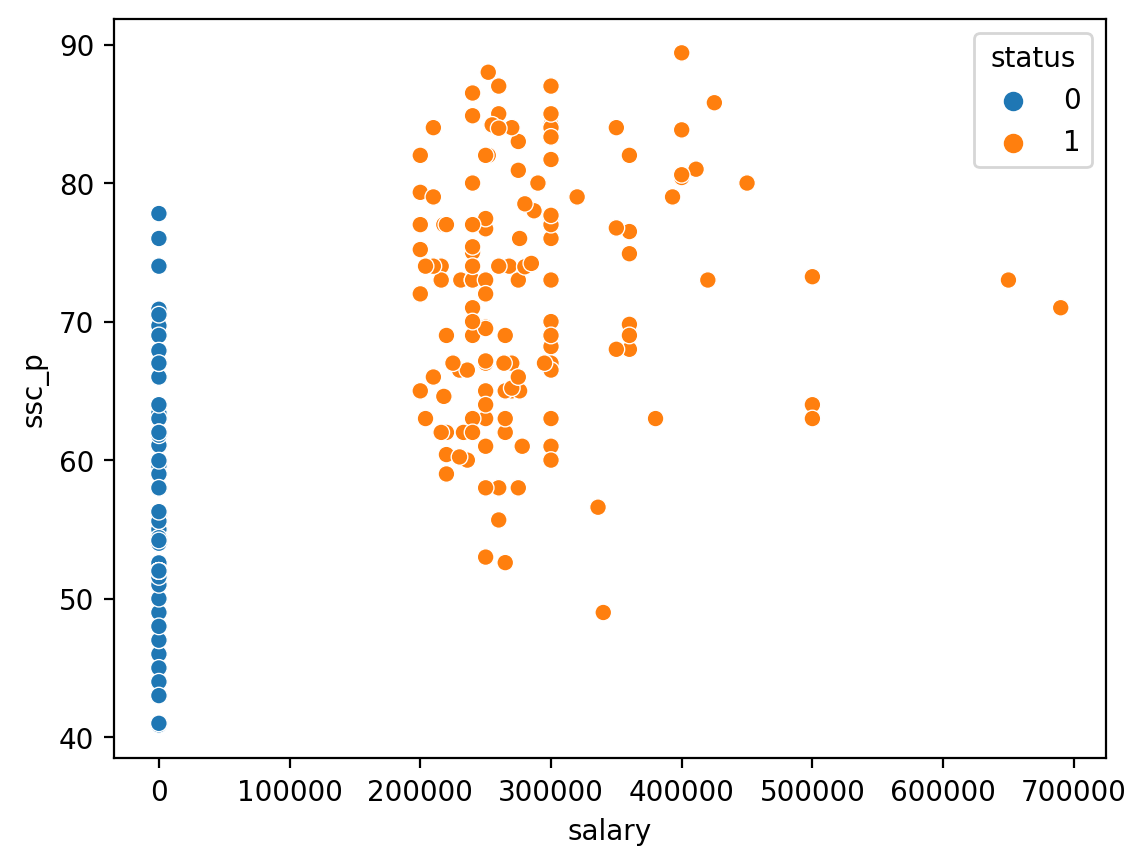

In [82]:
sns.scatterplot(x = 'salary',y='ssc_p', hue = 'status', data = df_final);

### Intution
* clearly there is linearity between input features.
* We can see that there is a clear separation between data points according status

## Segregation of input and output features

In [95]:
X = data[['salary','ssc_p']]
y=data['status']

In [96]:
y = y.map({'Placed':1,'Not Placed':0})

## Spliting the data into train and test

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
#stratify to preserve the ratio to balance the data

## Data preprocessing of train and test data

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_trns=sc.fit_transform(X_train)

In [99]:
X_test_trns = sc.transform(X_test)

## Building the Architecture

In [100]:
model = Sequential()
model.add(Dense(6,activation='tanh',kernel_initializer = 'glorot_normal', input_dim = 2))
model.add(Dense(5,activation='tanh',kernel_initializer = 'glorot_normal'))
model.add(Dense(4,activation='tanh',kernel_initializer = 'glorot_normal'))
model.add(Dense(2,activation='tanh',kernel_initializer = 'glorot_normal'))
model.add(Dense(1,activation='sigmoid'))
#random_uniform
#random_normal
#glorot_normal
#glorot_uniform
#he_normal
#he_uniform

In [101]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6)                 18        
                                                                 
 dense_6 (Dense)             (None, 5)                 35        
                                                                 
 dense_7 (Dense)             (None, 4)                 24        
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 90
Trainable params: 90
Non-trainable params: 0
_________________________________________________________________


## Compiling the Architecture & Model Creation

In [102]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

## Model Training Phase

In [103]:
history = model.fit(X_train_trns,y_train,epochs = 250,validation_split = 0.2 )

Epoch 1/250
5/5 [==============================] - 1s 56ms/step - loss: 1.0925 - accuracy: 0.1250 - val_loss: 1.0454 - val_accuracy: 0.1714
Epoch 2/250
5/5 [==============================] - 0s 12ms/step - loss: 1.0298 - accuracy: 0.1838 - val_loss: 0.9890 - val_accuracy: 0.2286
Epoch 3/250
5/5 [==============================] - 0s 12ms/step - loss: 0.9697 - accuracy: 0.2426 - val_loss: 0.9371 - val_accuracy: 0.2571
Epoch 4/250
5/5 [==============================] - 0s 12ms/step - loss: 0.9151 - accuracy: 0.3235 - val_loss: 0.8892 - val_accuracy: 0.2857
Epoch 5/250
5/5 [==============================] - 0s 12ms/step - loss: 0.8649 - accuracy: 0.3382 - val_loss: 0.8454 - val_accuracy: 0.3714
Epoch 6/250
5/5 [==============================] - 0s 12ms/step - loss: 0.8206 - accuracy: 0.3897 - val_loss: 0.8055 - val_accuracy: 0.4000
Epoch 7/250
5/5 [==============================] - 0s 12ms/step - loss: 0.7813 - accuracy: 0.4338 - val_loss: 0.7694 - val_accuracy: 0.4571
Epoch 8/250
5/5 [===

## Prediction Phase

In [104]:
Y_cap = model.predict(X_test_trns)

2/2 [==============================] - 0s 16ms/step


In [105]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [106]:
Y_cap_f

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1]])

## Model Evaluation

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

1.0

## Ploting the Best Decision Surface Region

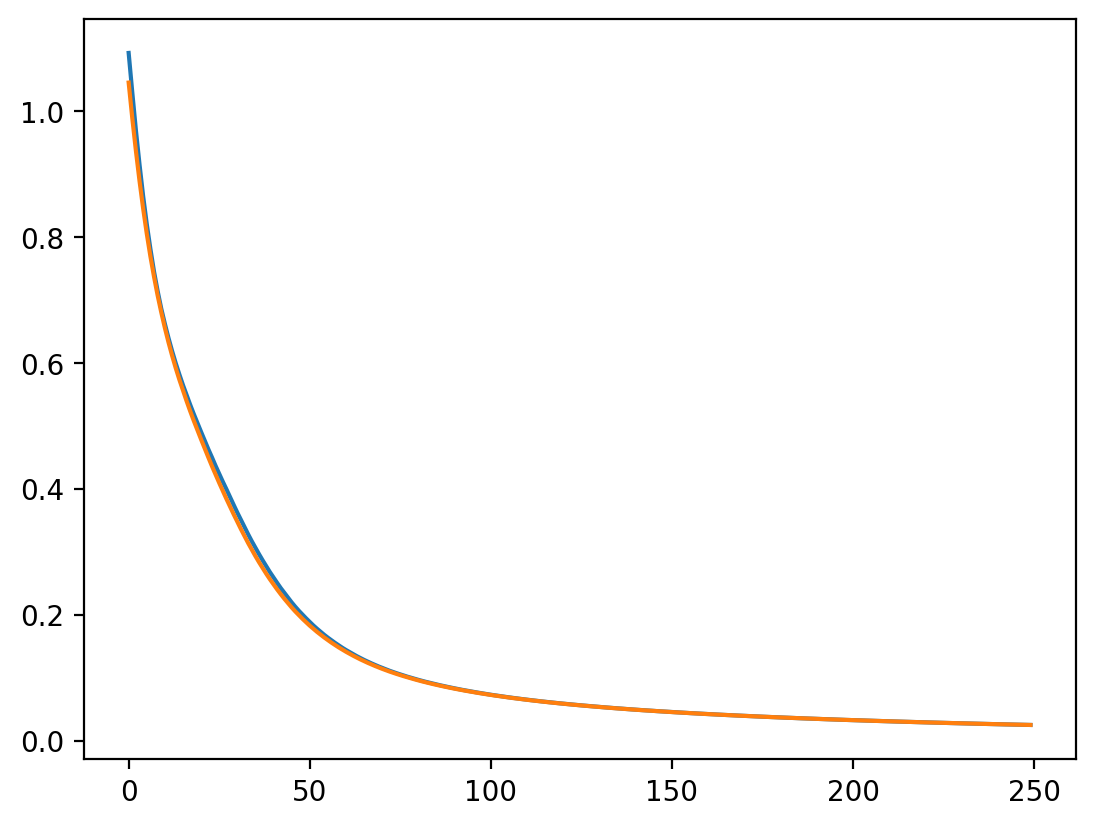

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [109]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 15s 2ms/step


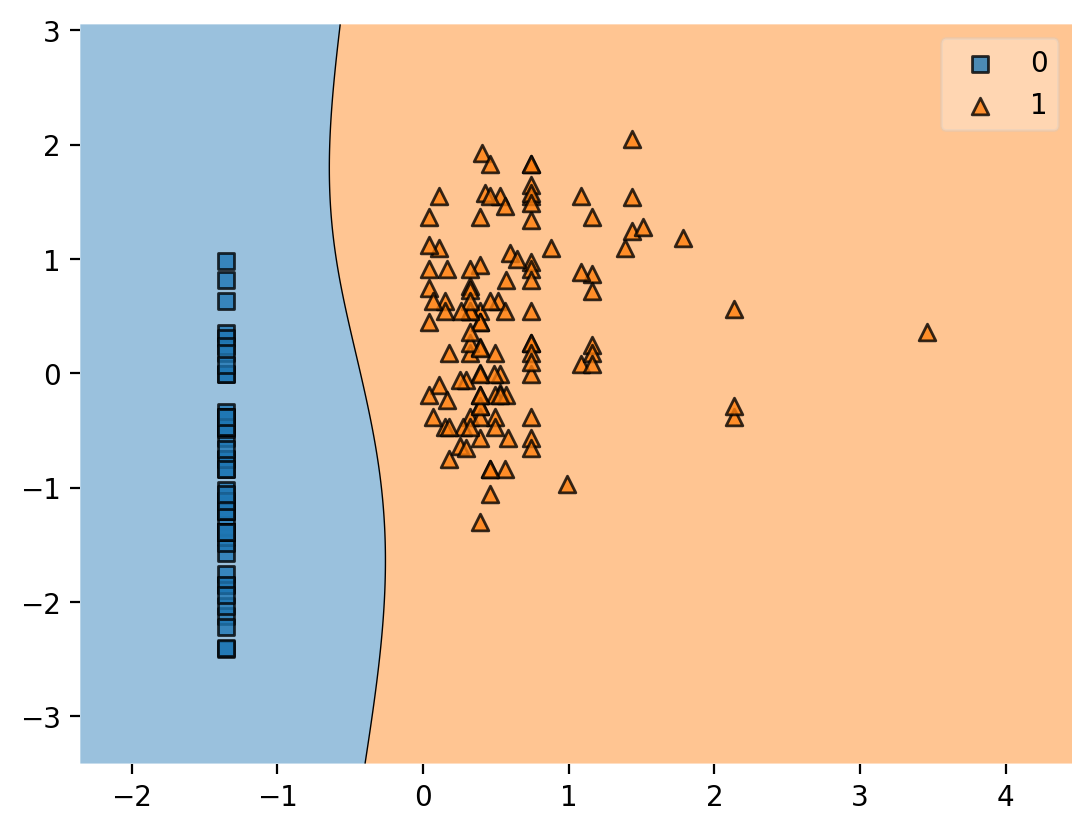

In [110]:
plot_decision_regions(X_train_trns, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 15s 2ms/step


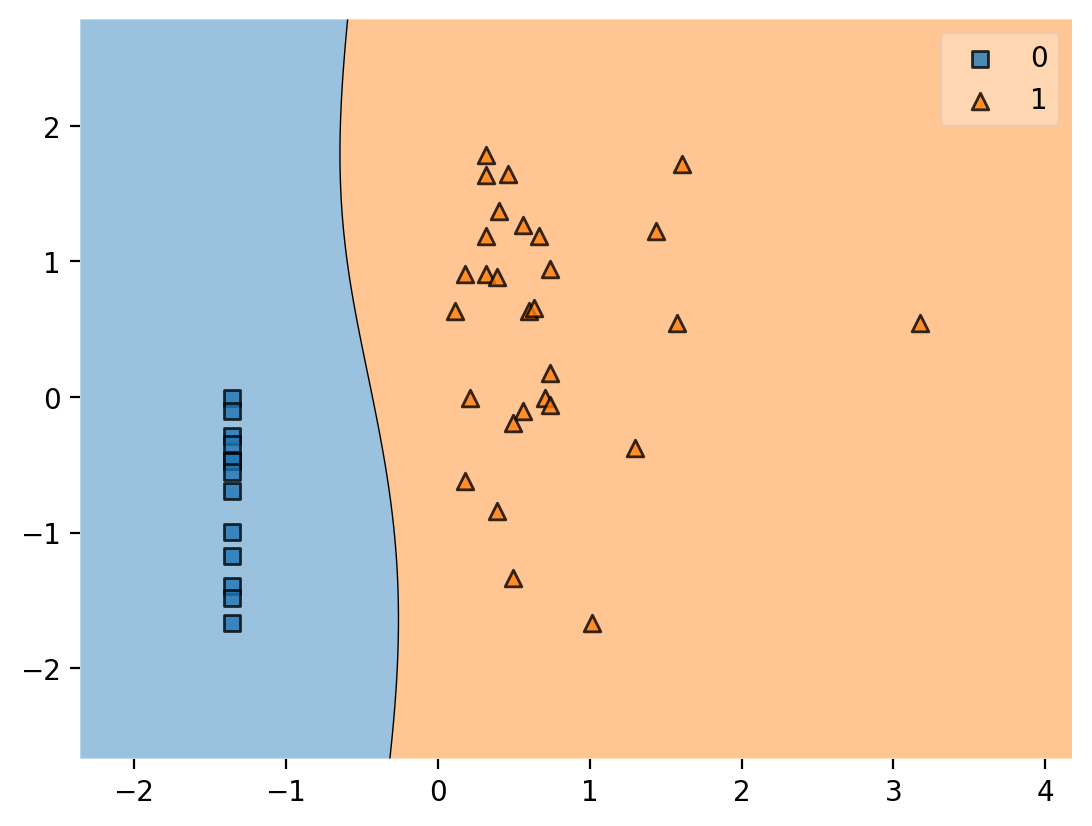

In [111]:
plot_decision_regions(X_test_trns, y_test.values.astype(int), clf = model);

## Conclusions:
* THe train score turned out to be `100% and validation score 100%.`
* I have predicted and evaluated the model’s performance, got a score of `100% on the unseen data.`
* There is no overfiting as the train score and the test score almost equal which proves that my model has learned well from the train data and predicted well on the unseen data.
* As we know for a best fit model the train and test score should be as high as possible.